# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 9180 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (   0 of 9180) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 9180) |                       | Elapsed Time: 0:00:26 ETA: 7:26:34

  0% (  25 of 9180) |                       | Elapsed Time: 0:00:26 ETA: 2:41:46

  0% (  39 of 9180) |                       | Elapsed Time: 0:00:26 ETA: 1:44:25

  0% (  54 of 9180) |                       | Elapsed Time: 0:00:26 ETA: 1:15:53

  0% (  70 of 9180) |                       | Elapsed Time: 0:00:27 ETA: 0:02:07

  0% (  85 of 9180) |                       | Elapsed Time: 0:00:27 ETA: 0:02:08

  1% ( 100 of 9180) |                       | Elapsed Time: 0:00:27 ETA: 0:02:10

  1% ( 115 of 9180) |                       | Elapsed Time: 0:00:27 ETA: 0:02:05

  1% ( 130 of 9180) |                       | Elapsed Time: 0:00:27 ETA: 0:02:06

  1% ( 145 of 9180) |                       | Elapsed Time: 0:00:28 ETA: 0:02:07

  1% ( 161 of 9180) |                       | Elapsed Time: 0:00:28 ETA: 0:02:04

  1% ( 175 of 9180) |                       | Elapsed Time: 0:00:28 ETA: 0:02:09

  2% ( 193 of 9180) |                       | Elapsed Time: 0:00:28 ETA: 0:02:02

  2% ( 208 of 9180) |                       | Elapsed Time: 0:00:29 ETA: 0:02:03

  2% ( 223 of 9180) |                       | Elapsed Time: 0:00:29 ETA: 0:02:05

  2% ( 238 of 9180) |                       | Elapsed Time: 0:00:29 ETA: 0:02:05

  2% ( 254 of 9180) |                       | Elapsed Time: 0:00:29 ETA: 0:02:01

  2% ( 269 of 9180) |                       | Elapsed Time: 0:00:29 ETA: 0:02:03

  3% ( 285 of 9180) |                       | Elapsed Time: 0:00:30 ETA: 0:02:02

  3% ( 301 of 9180) |                       | Elapsed Time: 0:00:30 ETA: 0:01:59

  3% ( 317 of 9180) |                       | Elapsed Time: 0:00:30 ETA: 0:01:57

  3% ( 333 of 9180) |                       | Elapsed Time: 0:00:30 ETA: 0:01:55

  3% ( 353 of 9180) |                       | Elapsed Time: 0:00:31 ETA: 0:01:55

  4% ( 369 of 9180) |                       | Elapsed Time: 0:00:31 ETA: 0:01:55

  4% ( 385 of 9180) |                       | Elapsed Time: 0:00:31 ETA: 0:01:54

  4% ( 401 of 9180) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:55

  4% ( 417 of 9180) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:54

  4% ( 433 of 9180) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:53

  4% ( 449 of 9180) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:54

  5% ( 466 of 9180) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:59

  5% ( 482 of 9180) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:59

  5% ( 498 of 9180) |#                      | Elapsed Time: 0:00:32 ETA: 0:02:00

  5% ( 513 of 9180) |#                      | Elapsed Time: 0:00:33 ETA: 0:02:02

  5% ( 530 of 9180) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:57

  5% ( 548 of 9180) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:51

  6% ( 564 of 9180) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:50

  6% ( 581 of 9180) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:52

  6% ( 596 of 9180) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:52

  6% ( 611 of 9180) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:56

  6% ( 627 of 9180) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:59

  7% ( 643 of 9180) |#                      | Elapsed Time: 0:00:34 ETA: 0:01:59

  7% ( 659 of 9180) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:57

  7% ( 675 of 9180) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:56

  7% ( 697 of 9180) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:55

  7% ( 713 of 9180) |#                      | Elapsed Time: 0:00:35 ETA: 0:01:55

  7% ( 729 of 9180) |#                      | Elapsed Time: 0:00:36 ETA: 0:01:54

  8% ( 745 of 9180) |#                      | Elapsed Time: 0:00:36 ETA: 0:01:54

  8% ( 761 of 9180) |#                      | Elapsed Time: 0:00:36 ETA: 0:01:53

  8% ( 777 of 9180) |#                      | Elapsed Time: 0:00:36 ETA: 0:01:53

  8% ( 793 of 9180) |#                      | Elapsed Time: 0:00:36 ETA: 0:01:52

  8% ( 812 of 9180) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:51

  9% ( 828 of 9180) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:51

  9% ( 844 of 9180) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:51

  9% ( 860 of 9180) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:51

  9% ( 876 of 9180) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:51

  9% ( 892 of 9180) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:51

  9% ( 908 of 9180) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:51

 10% ( 924 of 9180) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:55

 10% ( 939 of 9180) |##                     | Elapsed Time: 0:00:38 ETA: 0:01:57

 10% ( 954 of 9180) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:59

 10% ( 969 of 9180) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:59

 10% ( 985 of 9180) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:58

 10% ( 999 of 9180) |##                     | Elapsed Time: 0:00:39 ETA: 0:01:58

 11% (1013 of 9180) |##                     | Elapsed Time: 0:00:40 ETA: 0:01:59

 11% (1033 of 9180) |##                     | Elapsed Time: 0:00:40 ETA: 0:01:59

 11% (1049 of 9180) |##                     | Elapsed Time: 0:00:40 ETA: 0:02:00

 11% (1066 of 9180) |##                     | Elapsed Time: 0:00:40 ETA: 0:01:58

 11% (1083 of 9180) |##                     | Elapsed Time: 0:00:41 ETA: 0:01:51

 11% (1099 of 9180) |##                     | Elapsed Time: 0:00:41 ETA: 0:01:50

 12% (1114 of 9180) |##                     | Elapsed Time: 0:00:41 ETA: 0:01:47

 12% (1129 of 9180) |##                     | Elapsed Time: 0:00:41 ETA: 0:01:47

 12% (1148 of 9180) |##                     | Elapsed Time: 0:00:41 ETA: 0:01:50

 12% (1164 of 9180) |##                     | Elapsed Time: 0:00:42 ETA: 0:01:50

 12% (1180 of 9180) |##                     | Elapsed Time: 0:00:42 ETA: 0:01:48

 13% (1196 of 9180) |##                     | Elapsed Time: 0:00:42 ETA: 0:01:48

 13% (1212 of 9180) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:45

 13% (1228 of 9180) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:44

 13% (1244 of 9180) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:44

 13% (1263 of 9180) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:44

 13% (1279 of 9180) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:45

 14% (1295 of 9180) |###                    | Elapsed Time: 0:00:43 ETA: 0:01:46

 14% (1312 of 9180) |###                    | Elapsed Time: 0:00:44 ETA: 0:01:45

 14% (1329 of 9180) |###                    | Elapsed Time: 0:00:44 ETA: 0:01:44

 14% (1347 of 9180) |###                    | Elapsed Time: 0:00:44 ETA: 0:01:40

 14% (1365 of 9180) |###                    | Elapsed Time: 0:00:44 ETA: 0:01:37

 15% (1386 of 9180) |###                    | Elapsed Time: 0:00:44 ETA: 0:01:35

 15% (1403 of 9180) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:34

 15% (1419 of 9180) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:35

 15% (1432 of 9180) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:41

 15% (1446 of 9180) |###                    | Elapsed Time: 0:00:45 ETA: 0:01:47

 15% (1462 of 9180) |###                    | Elapsed Time: 0:00:46 ETA: 0:01:50

 16% (1477 of 9180) |###                    | Elapsed Time: 0:00:46 ETA: 0:01:52

 16% (1500 of 9180) |###                    | Elapsed Time: 0:00:46 ETA: 0:01:50

 16% (1516 of 9180) |###                    | Elapsed Time: 0:00:46 ETA: 0:01:45

 16% (1532 of 9180) |###                    | Elapsed Time: 0:00:47 ETA: 0:01:43

 16% (1547 of 9180) |###                    | Elapsed Time: 0:00:47 ETA: 0:01:43

 17% (1563 of 9180) |###                    | Elapsed Time: 0:00:47 ETA: 0:01:43

 17% (1579 of 9180) |###                    | Elapsed Time: 0:00:47 ETA: 0:01:43

 17% (1595 of 9180) |###                    | Elapsed Time: 0:00:47 ETA: 0:01:44

 17% (1616 of 9180) |####                   | Elapsed Time: 0:00:48 ETA: 0:01:41

 17% (1624 of 9180) |####                   | Elapsed Time: 0:00:48 ETA: 0:01:41

 17% (1638 of 9180) |####                   | Elapsed Time: 0:00:49 ETA: 0:03:00

 18% (1655 of 9180) |####                   | Elapsed Time: 0:00:49 ETA: 0:02:57

 18% (1671 of 9180) |####                   | Elapsed Time: 0:00:49 ETA: 0:02:57

 18% (1686 of 9180) |####                   | Elapsed Time: 0:00:49 ETA: 0:03:05

 18% (1702 of 9180) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:40

 18% (1722 of 9180) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:42

 18% (1738 of 9180) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:42

 19% (1755 of 9180) |####                   | Elapsed Time: 0:00:50 ETA: 0:01:40

 19% (1773 of 9180) |####                   | Elapsed Time: 0:00:51 ETA: 0:01:37

 19% (1788 of 9180) |####                   | Elapsed Time: 0:00:51 ETA: 0:01:37

 19% (1806 of 9180) |####                   | Elapsed Time: 0:00:51 ETA: 0:01:33

 19% (1822 of 9180) |####                   | Elapsed Time: 0:00:51 ETA: 0:01:33

 20% (1844 of 9180) |####                   | Elapsed Time: 0:00:51 ETA: 0:01:34

 20% (1861 of 9180) |####                   | Elapsed Time: 0:00:52 ETA: 0:01:34

 20% (1877 of 9180) |####                   | Elapsed Time: 0:00:52 ETA: 0:01:34

 20% (1892 of 9180) |####                   | Elapsed Time: 0:00:52 ETA: 0:01:36

 20% (1905 of 9180) |####                   | Elapsed Time: 0:00:52 ETA: 0:01:39

 20% (1921 of 9180) |####                   | Elapsed Time: 0:00:53 ETA: 0:01:40

 21% (1937 of 9180) |####                   | Elapsed Time: 0:00:53 ETA: 0:01:39

 21% (1959 of 9180) |####                   | Elapsed Time: 0:00:53 ETA: 0:01:37

 21% (1975 of 9180) |####                   | Elapsed Time: 0:00:53 ETA: 0:01:34

 21% (1991 of 9180) |####                   | Elapsed Time: 0:00:53 ETA: 0:01:33

 21% (2007 of 9180) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:34

 22% (2021 of 9180) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:36

 22% (2037 of 9180) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:37

 22% (2055 of 9180) |#####                  | Elapsed Time: 0:00:54 ETA: 0:01:35

 22% (2075 of 9180) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:32

 22% (2093 of 9180) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:30

 22% (2111 of 9180) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:26

 23% (2129 of 9180) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:26

 23% (2145 of 9180) |#####                  | Elapsed Time: 0:00:55 ETA: 0:01:27

 23% (2161 of 9180) |#####                  | Elapsed Time: 0:00:56 ETA: 0:01:28

 23% (2181 of 9180) |#####                  | Elapsed Time: 0:00:56 ETA: 0:01:29

 23% (2198 of 9180) |#####                  | Elapsed Time: 0:00:56 ETA: 0:01:29

 24% (2214 of 9180) |#####                  | Elapsed Time: 0:00:56 ETA: 0:01:30

 24% (2229 of 9180) |#####                  | Elapsed Time: 0:00:57 ETA: 0:01:32

 24% (2245 of 9180) |#####                  | Elapsed Time: 0:00:57 ETA: 0:01:34

 24% (2261 of 9180) |#####                  | Elapsed Time: 0:00:57 ETA: 0:01:35

 24% (2277 of 9180) |#####                  | Elapsed Time: 0:00:57 ETA: 0:01:34

 25% (2295 of 9180) |#####                  | Elapsed Time: 0:00:57 ETA: 0:01:29

 25% (2312 of 9180) |#####                  | Elapsed Time: 0:00:58 ETA: 0:01:28

 25% (2330 of 9180) |#####                  | Elapsed Time: 0:00:58 ETA: 0:01:26

 25% (2345 of 9180) |#####                  | Elapsed Time: 0:00:58 ETA: 0:01:28

 25% (2361 of 9180) |#####                  | Elapsed Time: 0:00:58 ETA: 0:01:28

 25% (2377 of 9180) |#####                  | Elapsed Time: 0:00:58 ETA: 0:01:28

 26% (2393 of 9180) |#####                  | Elapsed Time: 0:00:59 ETA: 0:01:28

 26% (2410 of 9180) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:29

 26% (2429 of 9180) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:22

 26% (2447 of 9180) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:21

 26% (2465 of 9180) |######                 | Elapsed Time: 0:00:59 ETA: 0:01:19

 27% (2481 of 9180) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:19

 27% (2496 of 9180) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:23

 27% (2511 of 9180) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:27

 27% (2533 of 9180) |######                 | Elapsed Time: 0:01:00 ETA: 0:01:29

 27% (2549 of 9180) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:31

 27% (2565 of 9180) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:29

 28% (2582 of 9180) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:26

 28% (2596 of 9180) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:27

 28% (2611 of 9180) |######                 | Elapsed Time: 0:01:01 ETA: 0:01:28

 28% (2625 of 9180) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:32

 28% (2640 of 9180) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:37

 28% (2658 of 9180) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:33

 29% (2673 of 9180) |######                 | Elapsed Time: 0:01:02 ETA: 0:01:33

 29% (2689 of 9180) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:30

 29% (2705 of 9180) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:26

 29% (2721 of 9180) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:27

 29% (2737 of 9180) |######                 | Elapsed Time: 0:01:03 ETA: 0:01:26

 30% (2762 of 9180) |######                 | Elapsed Time: 0:01:04 ETA: 0:01:24

 30% (2778 of 9180) |######                 | Elapsed Time: 0:01:04 ETA: 0:01:23

 30% (2795 of 9180) |#######                | Elapsed Time: 0:01:04 ETA: 0:01:21

 30% (2812 of 9180) |#######                | Elapsed Time: 0:01:04 ETA: 0:01:19

 30% (2828 of 9180) |#######                | Elapsed Time: 0:01:04 ETA: 0:01:20

 31% (2846 of 9180) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:19

 31% (2869 of 9180) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:20

 31% (2887 of 9180) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:19

 31% (2905 of 9180) |#######                | Elapsed Time: 0:01:05 ETA: 0:01:18

 31% (2923 of 9180) |#######                | Elapsed Time: 0:01:06 ETA: 0:01:17

 32% (2940 of 9180) |#######                | Elapsed Time: 0:01:06 ETA: 0:01:18

 32% (2957 of 9180) |#######                | Elapsed Time: 0:01:06 ETA: 0:01:17

 32% (2974 of 9180) |#######                | Elapsed Time: 0:01:06 ETA: 0:01:18

 32% (2993 of 9180) |#######                | Elapsed Time: 0:01:06 ETA: 0:01:17

 32% (3009 of 9180) |#######                | Elapsed Time: 0:01:07 ETA: 0:01:19

 32% (3025 of 9180) |#######                | Elapsed Time: 0:01:07 ETA: 0:01:18

 33% (3042 of 9180) |#######                | Elapsed Time: 0:01:07 ETA: 0:01:18

 33% (3060 of 9180) |#######                | Elapsed Time: 0:01:07 ETA: 0:01:18

 33% (3078 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:01:16

 33% (3099 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:01:18

 33% (3117 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:01:15

 34% (3135 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:01:14

 34% (3152 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:01:14

 34% (3169 of 9180) |#######                | Elapsed Time: 0:01:09 ETA: 0:01:14

 34% (3185 of 9180) |#######                | Elapsed Time: 0:01:09 ETA: 0:01:13

 34% (3200 of 9180) |########               | Elapsed Time: 0:01:09 ETA: 0:01:17

 35% (3221 of 9180) |########               | Elapsed Time: 0:01:09 ETA: 0:01:21

 35% (3237 of 9180) |########               | Elapsed Time: 0:01:10 ETA: 0:01:21

 35% (3253 of 9180) |########               | Elapsed Time: 0:01:10 ETA: 0:01:23

 35% (3269 of 9180) |########               | Elapsed Time: 0:01:10 ETA: 0:01:23

 35% (3285 of 9180) |########               | Elapsed Time: 0:01:10 ETA: 0:01:22

 35% (3299 of 9180) |########               | Elapsed Time: 0:01:10 ETA: 0:01:22

 36% (3317 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:01:19

 36% (3337 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:01:17

 36% (3355 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:01:14

 36% (3372 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:01:12

 36% (3390 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:01:11

 37% (3406 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:01:11

 37% (3423 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:01:11

 37% (3443 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:01:11

 37% (3459 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:01:11

 37% (3477 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:01:11

 38% (3494 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:01:11

 38% (3511 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:01:10

 38% (3529 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:01:10

 38% (3547 of 9180) |########               | Elapsed Time: 0:01:14 ETA: 0:01:09

 38% (3564 of 9180) |########               | Elapsed Time: 0:01:14 ETA: 0:01:13

 38% (3580 of 9180) |########               | Elapsed Time: 0:01:14 ETA: 0:01:13

 39% (3596 of 9180) |#########              | Elapsed Time: 0:01:14 ETA: 0:01:16

 39% (3614 of 9180) |#########              | Elapsed Time: 0:01:14 ETA: 0:01:15

 39% (3632 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:12

 39% (3645 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:13

 39% (3661 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:12

 40% (3680 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:01:11

 40% (3698 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:01:12

 40% (3716 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:01:10

 40% (3732 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:01:08

 40% (3748 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:01:08

 41% (3764 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:01:09

 41% (3787 of 9180) |#########              | Elapsed Time: 0:01:17 ETA: 0:01:10

 41% (3801 of 9180) |#########              | Elapsed Time: 0:01:17 ETA: 0:01:12

 41% (3819 of 9180) |#########              | Elapsed Time: 0:01:17 ETA: 0:01:11

 41% (3836 of 9180) |#########              | Elapsed Time: 0:01:17 ETA: 0:01:10

 41% (3854 of 9180) |#########              | Elapsed Time: 0:01:18 ETA: 0:01:08

 42% (3870 of 9180) |#########              | Elapsed Time: 0:01:18 ETA: 0:01:06

 42% (3886 of 9180) |#########              | Elapsed Time: 0:01:18 ETA: 0:01:06

 42% (3902 of 9180) |#########              | Elapsed Time: 0:01:18 ETA: 0:01:07

 42% (3918 of 9180) |#########              | Elapsed Time: 0:01:18 ETA: 0:01:08

 42% (3933 of 9180) |#########              | Elapsed Time: 0:01:19 ETA: 0:01:09

 43% (3949 of 9180) |#########              | Elapsed Time: 0:01:19 ETA: 0:01:09

 43% (3966 of 9180) |#########              | Elapsed Time: 0:01:19 ETA: 0:01:09

 43% (3981 of 9180) |#########              | Elapsed Time: 0:01:19 ETA: 0:01:09

 43% (3998 of 9180) |##########             | Elapsed Time: 0:01:19 ETA: 0:01:07

 43% (4017 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:06

 43% (4034 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:06

 44% (4052 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:03

 44% (4069 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:03

 44% (4086 of 9180) |##########             | Elapsed Time: 0:01:21 ETA: 0:01:03

 44% (4101 of 9180) |##########             | Elapsed Time: 0:01:21 ETA: 0:01:04

 44% (4115 of 9180) |##########             | Elapsed Time: 0:01:21 ETA: 0:01:07

 45% (4131 of 9180) |##########             | Elapsed Time: 0:01:21 ETA: 0:01:08

 45% (4146 of 9180) |##########             | Elapsed Time: 0:01:21 ETA: 0:01:10

 45% (4162 of 9180) |##########             | Elapsed Time: 0:01:22 ETA: 0:01:09

 45% (4178 of 9180) |##########             | Elapsed Time: 0:01:22 ETA: 0:01:08

 45% (4196 of 9180) |##########             | Elapsed Time: 0:01:22 ETA: 0:01:05

 45% (4220 of 9180) |##########             | Elapsed Time: 0:01:22 ETA: 0:01:03

 46% (4236 of 9180) |##########             | Elapsed Time: 0:01:23 ETA: 0:01:03

 46% (4253 of 9180) |##########             | Elapsed Time: 0:01:23 ETA: 0:01:04

 46% (4267 of 9180) |##########             | Elapsed Time: 0:01:23 ETA: 0:01:07

 46% (4281 of 9180) |##########             | Elapsed Time: 0:01:23 ETA: 0:01:09

 46% (4295 of 9180) |##########             | Elapsed Time: 0:01:23 ETA: 0:01:11

 46% (4309 of 9180) |##########             | Elapsed Time: 0:01:24 ETA: 0:01:14

 47% (4326 of 9180) |##########             | Elapsed Time: 0:01:24 ETA: 0:01:10

 47% (4342 of 9180) |##########             | Elapsed Time: 0:01:24 ETA: 0:01:08

 47% (4361 of 9180) |##########             | Elapsed Time: 0:01:24 ETA: 0:01:04

 47% (4377 of 9180) |##########             | Elapsed Time: 0:01:25 ETA: 0:01:02

 47% (4393 of 9180) |###########            | Elapsed Time: 0:01:25 ETA: 0:01:02

 48% (4410 of 9180) |###########            | Elapsed Time: 0:01:25 ETA: 0:01:01

 48% (4429 of 9180) |###########            | Elapsed Time: 0:01:25 ETA: 0:00:59

 48% (4445 of 9180) |###########            | Elapsed Time: 0:01:25 ETA: 0:00:59

 48% (4462 of 9180) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:58

 48% (4484 of 9180) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:57

 49% (4501 of 9180) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:57

 49% (4519 of 9180) |###########            | Elapsed Time: 0:01:26 ETA: 0:00:57

 49% (4536 of 9180) |###########            | Elapsed Time: 0:01:27 ETA: 0:00:57

 49% (4553 of 9180) |###########            | Elapsed Time: 0:01:27 ETA: 0:00:57

 49% (4569 of 9180) |###########            | Elapsed Time: 0:01:27 ETA: 0:00:59

 50% (4590 of 9180) |###########            | Elapsed Time: 0:01:27 ETA: 0:00:59

 50% (4607 of 9180) |###########            | Elapsed Time: 0:01:27 ETA: 0:00:59

 50% (4625 of 9180) |###########            | Elapsed Time: 0:01:28 ETA: 0:00:58

 50% (4641 of 9180) |###########            | Elapsed Time: 0:01:28 ETA: 0:00:59

 50% (4658 of 9180) |###########            | Elapsed Time: 0:01:28 ETA: 0:00:57

 50% (4675 of 9180) |###########            | Elapsed Time: 0:01:28 ETA: 0:00:56

 51% (4691 of 9180) |###########            | Elapsed Time: 0:01:29 ETA: 0:00:57

 51% (4713 of 9180) |###########            | Elapsed Time: 0:01:29 ETA: 0:00:56

 51% (4729 of 9180) |###########            | Elapsed Time: 0:01:29 ETA: 0:00:57

 51% (4746 of 9180) |###########            | Elapsed Time: 0:01:29 ETA: 0:00:56

 51% (4763 of 9180) |###########            | Elapsed Time: 0:01:29 ETA: 0:00:56

 52% (4781 of 9180) |###########            | Elapsed Time: 0:01:30 ETA: 0:00:54

 52% (4797 of 9180) |############           | Elapsed Time: 0:01:30 ETA: 0:00:55

 52% (4820 of 9180) |############           | Elapsed Time: 0:01:30 ETA: 0:00:55

 52% (4832 of 9180) |############           | Elapsed Time: 0:01:31 ETA: 0:01:50

 52% (4848 of 9180) |############           | Elapsed Time: 0:01:32 ETA: 0:01:54

 52% (4864 of 9180) |############           | Elapsed Time: 0:01:32 ETA: 0:01:55

 53% (4881 of 9180) |############           | Elapsed Time: 0:01:32 ETA: 0:01:53

 53% (4898 of 9180) |############           | Elapsed Time: 0:01:32 ETA: 0:00:57

 53% (4915 of 9180) |############           | Elapsed Time: 0:01:32 ETA: 0:00:54

 53% (4935 of 9180) |############           | Elapsed Time: 0:01:33 ETA: 0:00:55

 53% (4951 of 9180) |############           | Elapsed Time: 0:01:33 ETA: 0:00:54

 54% (4967 of 9180) |############           | Elapsed Time: 0:01:33 ETA: 0:00:55

 54% (4983 of 9180) |############           | Elapsed Time: 0:01:33 ETA: 0:00:54

 54% (5000 of 9180) |############           | Elapsed Time: 0:01:34 ETA: 0:00:54

 54% (5017 of 9180) |############           | Elapsed Time: 0:01:34 ETA: 0:00:53

 54% (5031 of 9180) |############           | Elapsed Time: 0:01:34 ETA: 0:00:54

 55% (5049 of 9180) |############           | Elapsed Time: 0:01:34 ETA: 0:00:54

 55% (5066 of 9180) |############           | Elapsed Time: 0:01:34 ETA: 0:00:53

 55% (5084 of 9180) |############           | Elapsed Time: 0:01:35 ETA: 0:00:52

 55% (5102 of 9180) |############           | Elapsed Time: 0:01:35 ETA: 0:00:50

 55% (5120 of 9180) |############           | Elapsed Time: 0:01:35 ETA: 0:00:48

 55% (5137 of 9180) |############           | Elapsed Time: 0:01:35 ETA: 0:00:48

 56% (5151 of 9180) |############           | Elapsed Time: 0:01:35 ETA: 0:00:50

 56% (5172 of 9180) |############           | Elapsed Time: 0:01:36 ETA: 0:00:52

 56% (5188 of 9180) |############           | Elapsed Time: 0:01:36 ETA: 0:00:52

 56% (5205 of 9180) |#############          | Elapsed Time: 0:01:36 ETA: 0:00:53

 56% (5221 of 9180) |#############          | Elapsed Time: 0:01:36 ETA: 0:00:53

 57% (5237 of 9180) |#############          | Elapsed Time: 0:01:37 ETA: 0:00:53

 57% (5252 of 9180) |#############          | Elapsed Time: 0:01:37 ETA: 0:00:52

 57% (5268 of 9180) |#############          | Elapsed Time: 0:01:37 ETA: 0:00:52

 57% (5287 of 9180) |#############          | Elapsed Time: 0:01:37 ETA: 0:00:52

 57% (5303 of 9180) |#############          | Elapsed Time: 0:01:37 ETA: 0:00:51

 57% (5319 of 9180) |#############          | Elapsed Time: 0:01:38 ETA: 0:00:50

 58% (5335 of 9180) |#############          | Elapsed Time: 0:01:38 ETA: 0:00:51

 58% (5352 of 9180) |#############          | Elapsed Time: 0:01:38 ETA: 0:00:50

 58% (5369 of 9180) |#############          | Elapsed Time: 0:01:38 ETA: 0:00:50

 58% (5385 of 9180) |#############          | Elapsed Time: 0:01:39 ETA: 0:00:50

 58% (5402 of 9180) |#############          | Elapsed Time: 0:01:39 ETA: 0:00:50

 59% (5418 of 9180) |#############          | Elapsed Time: 0:01:39 ETA: 0:00:49

 59% (5435 of 9180) |#############          | Elapsed Time: 0:01:39 ETA: 0:00:49

 59% (5453 of 9180) |#############          | Elapsed Time: 0:01:39 ETA: 0:00:48

 59% (5467 of 9180) |#############          | Elapsed Time: 0:01:40 ETA: 0:00:48

 59% (5481 of 9180) |#############          | Elapsed Time: 0:01:40 ETA: 0:00:49

 59% (5495 of 9180) |#############          | Elapsed Time: 0:01:40 ETA: 0:00:51

 60% (5516 of 9180) |#############          | Elapsed Time: 0:01:40 ETA: 0:00:52

 60% (5531 of 9180) |#############          | Elapsed Time: 0:01:41 ETA: 0:00:53

 60% (5548 of 9180) |#############          | Elapsed Time: 0:01:41 ETA: 0:00:51

 60% (5565 of 9180) |#############          | Elapsed Time: 0:01:41 ETA: 0:00:48

 60% (5582 of 9180) |#############          | Elapsed Time: 0:01:41 ETA: 0:00:47

 60% (5598 of 9180) |##############         | Elapsed Time: 0:01:41 ETA: 0:00:45

 61% (5615 of 9180) |##############         | Elapsed Time: 0:01:42 ETA: 0:00:44

 61% (5630 of 9180) |##############         | Elapsed Time: 0:01:42 ETA: 0:00:45

 61% (5644 of 9180) |##############         | Elapsed Time: 0:01:42 ETA: 0:00:47

 61% (5659 of 9180) |##############         | Elapsed Time: 0:01:42 ETA: 0:00:48

 61% (5675 of 9180) |##############         | Elapsed Time: 0:01:42 ETA: 0:00:48

 61% (5691 of 9180) |##############         | Elapsed Time: 0:01:43 ETA: 0:00:48

 62% (5705 of 9180) |##############         | Elapsed Time: 0:01:43 ETA: 0:00:48

 62% (5721 of 9180) |##############         | Elapsed Time: 0:01:43 ETA: 0:00:47

 62% (5746 of 9180) |##############         | Elapsed Time: 0:01:43 ETA: 0:00:44

 62% (5764 of 9180) |##############         | Elapsed Time: 0:01:44 ETA: 0:00:44

 62% (5782 of 9180) |##############         | Elapsed Time: 0:01:44 ETA: 0:00:43

 63% (5798 of 9180) |##############         | Elapsed Time: 0:01:44 ETA: 0:00:41

 63% (5813 of 9180) |##############         | Elapsed Time: 0:01:44 ETA: 0:00:43

 63% (5828 of 9180) |##############         | Elapsed Time: 0:01:44 ETA: 0:00:44

 63% (5844 of 9180) |##############         | Elapsed Time: 0:01:45 ETA: 0:00:45

 63% (5861 of 9180) |##############         | Elapsed Time: 0:01:45 ETA: 0:00:44

 64% (5876 of 9180) |##############         | Elapsed Time: 0:01:45 ETA: 0:00:44

 64% (5892 of 9180) |##############         | Elapsed Time: 0:01:45 ETA: 0:00:44

 64% (5909 of 9180) |##############         | Elapsed Time: 0:01:46 ETA: 0:00:42

 64% (5927 of 9180) |##############         | Elapsed Time: 0:01:46 ETA: 0:00:41

 64% (5943 of 9180) |##############         | Elapsed Time: 0:01:46 ETA: 0:00:40

 64% (5959 of 9180) |##############         | Elapsed Time: 0:01:46 ETA: 0:00:40

 65% (5974 of 9180) |##############         | Elapsed Time: 0:01:46 ETA: 0:00:41

 65% (5988 of 9180) |###############        | Elapsed Time: 0:01:47 ETA: 0:00:44

 65% (6005 of 9180) |###############        | Elapsed Time: 0:01:47 ETA: 0:00:43

 65% (6021 of 9180) |###############        | Elapsed Time: 0:01:47 ETA: 0:00:43

 65% (6037 of 9180) |###############        | Elapsed Time: 0:01:47 ETA: 0:00:42

 65% (6054 of 9180) |###############        | Elapsed Time: 0:01:47 ETA: 0:00:40

 66% (6072 of 9180) |###############        | Elapsed Time: 0:01:48 ETA: 0:00:39

 66% (6091 of 9180) |###############        | Elapsed Time: 0:01:48 ETA: 0:00:38

 66% (6108 of 9180) |###############        | Elapsed Time: 0:01:48 ETA: 0:00:37

 66% (6125 of 9180) |###############        | Elapsed Time: 0:01:48 ETA: 0:00:36

 66% (6141 of 9180) |###############        | Elapsed Time: 0:01:49 ETA: 0:00:37

 67% (6157 of 9180) |###############        | Elapsed Time: 0:01:49 ETA: 0:00:38

 67% (6173 of 9180) |###############        | Elapsed Time: 0:01:49 ETA: 0:00:39

 67% (6189 of 9180) |###############        | Elapsed Time: 0:01:49 ETA: 0:00:39

 67% (6205 of 9180) |###############        | Elapsed Time: 0:01:49 ETA: 0:00:39

 67% (6219 of 9180) |###############        | Elapsed Time: 0:01:50 ETA: 0:00:40

 67% (6234 of 9180) |###############        | Elapsed Time: 0:01:50 ETA: 0:00:40

 68% (6250 of 9180) |###############        | Elapsed Time: 0:01:50 ETA: 0:00:40

 68% (6266 of 9180) |###############        | Elapsed Time: 0:01:50 ETA: 0:00:40

 68% (6282 of 9180) |###############        | Elapsed Time: 0:01:50 ETA: 0:00:39

 68% (6297 of 9180) |###############        | Elapsed Time: 0:01:51 ETA: 0:00:38

 68% (6312 of 9180) |###############        | Elapsed Time: 0:01:51 ETA: 0:00:38

 68% (6328 of 9180) |###############        | Elapsed Time: 0:01:51 ETA: 0:00:38

 69% (6344 of 9180) |###############        | Elapsed Time: 0:01:51 ETA: 0:00:38

 69% (6362 of 9180) |###############        | Elapsed Time: 0:01:51 ETA: 0:00:37

 69% (6379 of 9180) |###############        | Elapsed Time: 0:01:52 ETA: 0:00:35

 69% (6396 of 9180) |################       | Elapsed Time: 0:01:52 ETA: 0:00:35

 69% (6412 of 9180) |################       | Elapsed Time: 0:01:52 ETA: 0:00:35

 70% (6431 of 9180) |################       | Elapsed Time: 0:01:52 ETA: 0:00:36

 70% (6445 of 9180) |################       | Elapsed Time: 0:01:53 ETA: 0:00:38

 70% (6461 of 9180) |################       | Elapsed Time: 0:01:53 ETA: 0:00:38

 70% (6478 of 9180) |################       | Elapsed Time: 0:01:53 ETA: 0:00:37

 70% (6492 of 9180) |################       | Elapsed Time: 0:01:53 ETA: 0:00:38

 70% (6508 of 9180) |################       | Elapsed Time: 0:01:53 ETA: 0:00:36

 71% (6524 of 9180) |################       | Elapsed Time: 0:01:54 ETA: 0:00:35

 71% (6541 of 9180) |################       | Elapsed Time: 0:01:54 ETA: 0:00:35

 71% (6557 of 9180) |################       | Elapsed Time: 0:01:54 ETA: 0:00:35

 71% (6574 of 9180) |################       | Elapsed Time: 0:01:54 ETA: 0:00:34

 71% (6591 of 9180) |################       | Elapsed Time: 0:01:55 ETA: 0:00:33

 71% (6609 of 9180) |################       | Elapsed Time: 0:01:55 ETA: 0:00:31

 72% (6625 of 9180) |################       | Elapsed Time: 0:01:55 ETA: 0:00:31

 72% (6642 of 9180) |################       | Elapsed Time: 0:01:55 ETA: 0:00:30

 72% (6665 of 9180) |################       | Elapsed Time: 0:01:55 ETA: 0:00:31

 72% (6681 of 9180) |################       | Elapsed Time: 0:01:56 ETA: 0:00:31

 72% (6698 of 9180) |################       | Elapsed Time: 0:01:56 ETA: 0:00:31

 73% (6713 of 9180) |################       | Elapsed Time: 0:01:56 ETA: 0:00:32

 73% (6730 of 9180) |################       | Elapsed Time: 0:01:56 ETA: 0:00:32

 73% (6747 of 9180) |################       | Elapsed Time: 0:01:57 ETA: 0:00:32

 73% (6771 of 9180) |################       | Elapsed Time: 0:01:57 ETA: 0:00:31

 73% (6788 of 9180) |#################      | Elapsed Time: 0:01:57 ETA: 0:00:30

 74% (6805 of 9180) |#################      | Elapsed Time: 0:01:57 ETA: 0:00:29

 74% (6822 of 9180) |#################      | Elapsed Time: 0:01:58 ETA: 0:00:29

 74% (6838 of 9180) |#################      | Elapsed Time: 0:01:58 ETA: 0:00:29

 74% (6854 of 9180) |#################      | Elapsed Time: 0:01:58 ETA: 0:00:30

 74% (6869 of 9180) |#################      | Elapsed Time: 0:01:58 ETA: 0:00:30

 75% (6885 of 9180) |#################      | Elapsed Time: 0:01:58 ETA: 0:00:32

 75% (6899 of 9180) |#################      | Elapsed Time: 0:01:59 ETA: 0:00:32

 75% (6914 of 9180) |#################      | Elapsed Time: 0:01:59 ETA: 0:00:33

 75% (6931 of 9180) |#################      | Elapsed Time: 0:01:59 ETA: 0:00:32

 75% (6948 of 9180) |#################      | Elapsed Time: 0:01:59 ETA: 0:00:30

 75% (6964 of 9180) |#################      | Elapsed Time: 0:01:59 ETA: 0:00:29

 76% (6980 of 9180) |#################      | Elapsed Time: 0:02:00 ETA: 0:00:27

 76% (7000 of 9180) |#################      | Elapsed Time: 0:02:00 ETA: 0:00:27

 76% (7016 of 9180) |#################      | Elapsed Time: 0:02:00 ETA: 0:00:28

 76% (7032 of 9180) |#################      | Elapsed Time: 0:02:00 ETA: 0:00:28

 76% (7047 of 9180) |#################      | Elapsed Time: 0:02:01 ETA: 0:00:29

 76% (7064 of 9180) |#################      | Elapsed Time: 0:02:01 ETA: 0:00:28

 77% (7081 of 9180) |#################      | Elapsed Time: 0:02:01 ETA: 0:00:28

 77% (7097 of 9180) |#################      | Elapsed Time: 0:02:01 ETA: 0:00:27

 77% (7115 of 9180) |#################      | Elapsed Time: 0:02:01 ETA: 0:00:27

 77% (7132 of 9180) |#################      | Elapsed Time: 0:02:02 ETA: 0:00:26

 77% (7149 of 9180) |#################      | Elapsed Time: 0:02:02 ETA: 0:00:25

 78% (7164 of 9180) |#################      | Elapsed Time: 0:02:02 ETA: 0:00:26

 78% (7178 of 9180) |#################      | Elapsed Time: 0:02:02 ETA: 0:00:26

 78% (7194 of 9180) |##################     | Elapsed Time: 0:02:03 ETA: 0:00:27

 78% (7211 of 9180) |##################     | Elapsed Time: 0:02:03 ETA: 0:00:26

 78% (7230 of 9180) |##################     | Elapsed Time: 0:02:03 ETA: 0:00:24

 78% (7247 of 9180) |##################     | Elapsed Time: 0:02:03 ETA: 0:00:24

 79% (7262 of 9180) |##################     | Elapsed Time: 0:02:03 ETA: 0:00:24

 79% (7278 of 9180) |##################     | Elapsed Time: 0:02:04 ETA: 0:00:24

 79% (7291 of 9180) |##################     | Elapsed Time: 0:02:04 ETA: 0:00:25

 79% (7308 of 9180) |##################     | Elapsed Time: 0:02:04 ETA: 0:00:25

 79% (7322 of 9180) |##################     | Elapsed Time: 0:02:04 ETA: 0:00:26

 79% (7334 of 9180) |##################     | Elapsed Time: 0:02:04 ETA: 0:00:27

 80% (7352 of 9180) |##################     | Elapsed Time: 0:02:05 ETA: 0:00:26

 80% (7369 of 9180) |##################     | Elapsed Time: 0:02:05 ETA: 0:00:26

 80% (7385 of 9180) |##################     | Elapsed Time: 0:02:05 ETA: 0:00:25

 80% (7401 of 9180) |##################     | Elapsed Time: 0:02:05 ETA: 0:00:24

 80% (7419 of 9180) |##################     | Elapsed Time: 0:02:06 ETA: 0:00:23

 80% (7435 of 9180) |##################     | Elapsed Time: 0:02:06 ETA: 0:00:22

 81% (7459 of 9180) |##################     | Elapsed Time: 0:02:06 ETA: 0:00:21

 81% (7474 of 9180) |##################     | Elapsed Time: 0:02:06 ETA: 0:00:22

 81% (7486 of 9180) |##################     | Elapsed Time: 0:02:06 ETA: 0:00:23

 81% (7498 of 9180) |##################     | Elapsed Time: 0:02:07 ETA: 0:00:23

 81% (7516 of 9180) |##################     | Elapsed Time: 0:02:07 ETA: 0:00:23

 82% (7533 of 9180) |##################     | Elapsed Time: 0:02:07 ETA: 0:00:23

 82% (7547 of 9180) |##################     | Elapsed Time: 0:02:07 ETA: 0:00:23

 82% (7564 of 9180) |##################     | Elapsed Time: 0:02:08 ETA: 0:00:21

 82% (7583 of 9180) |##################     | Elapsed Time: 0:02:08 ETA: 0:00:20

 82% (7599 of 9180) |###################    | Elapsed Time: 0:02:08 ETA: 0:00:21

 82% (7616 of 9180) |###################    | Elapsed Time: 0:02:08 ETA: 0:00:20

 83% (7632 of 9180) |###################    | Elapsed Time: 0:02:08 ETA: 0:00:19

 83% (7649 of 9180) |###################    | Elapsed Time: 0:02:09 ETA: 0:00:19

 83% (7666 of 9180) |###################    | Elapsed Time: 0:02:09 ETA: 0:00:19

 83% (7689 of 9180) |###################    | Elapsed Time: 0:02:09 ETA: 0:00:18

 83% (7707 of 9180) |###################    | Elapsed Time: 0:02:09 ETA: 0:00:18

 84% (7723 of 9180) |###################    | Elapsed Time: 0:02:10 ETA: 0:00:18

 84% (7737 of 9180) |###################    | Elapsed Time: 0:02:10 ETA: 0:00:18

 84% (7753 of 9180) |###################    | Elapsed Time: 0:02:10 ETA: 0:00:18

 84% (7770 of 9180) |###################    | Elapsed Time: 0:02:10 ETA: 0:00:18

 84% (7786 of 9180) |###################    | Elapsed Time: 0:02:10 ETA: 0:00:18

 85% (7803 of 9180) |###################    | Elapsed Time: 0:02:11 ETA: 0:00:18

 85% (7819 of 9180) |###################    | Elapsed Time: 0:02:11 ETA: 0:00:17

 85% (7836 of 9180) |###################    | Elapsed Time: 0:02:11 ETA: 0:00:17

 85% (7852 of 9180) |###################    | Elapsed Time: 0:02:11 ETA: 0:00:17

 85% (7869 of 9180) |###################    | Elapsed Time: 0:02:11 ETA: 0:00:16

 85% (7887 of 9180) |###################    | Elapsed Time: 0:02:12 ETA: 0:00:16

 86% (7904 of 9180) |###################    | Elapsed Time: 0:02:12 ETA: 0:00:16

 86% (7926 of 9180) |###################    | Elapsed Time: 0:02:12 ETA: 0:00:16

 86% (7943 of 9180) |###################    | Elapsed Time: 0:02:12 ETA: 0:00:15

 86% (7960 of 9180) |###################    | Elapsed Time: 0:02:13 ETA: 0:00:15

 86% (7976 of 9180) |###################    | Elapsed Time: 0:02:13 ETA: 0:00:15

 87% (7992 of 9180) |####################   | Elapsed Time: 0:02:13 ETA: 0:00:15

 87% (8009 of 9180) |####################   | Elapsed Time: 0:02:13 ETA: 0:00:14

 87% (8023 of 9180) |####################   | Elapsed Time: 0:02:13 ETA: 0:00:15

 87% (8040 of 9180) |####################   | Elapsed Time: 0:02:14 ETA: 0:00:15

 87% (8056 of 9180) |####################   | Elapsed Time: 0:02:14 ETA: 0:00:15

 87% (8072 of 9180) |####################   | Elapsed Time: 0:02:14 ETA: 0:00:15

 88% (8087 of 9180) |####################   | Elapsed Time: 0:02:14 ETA: 0:00:15

 88% (8104 of 9180) |####################   | Elapsed Time: 0:02:15 ETA: 0:00:14

 88% (8120 of 9180) |####################   | Elapsed Time: 0:02:15 ETA: 0:00:14

 88% (8137 of 9180) |####################   | Elapsed Time: 0:02:15 ETA: 0:00:13

 88% (8156 of 9180) |####################   | Elapsed Time: 0:02:15 ETA: 0:00:13

 89% (8172 of 9180) |####################   | Elapsed Time: 0:02:15 ETA: 0:00:13

 89% (8188 of 9180) |####################   | Elapsed Time: 0:02:16 ETA: 0:00:12

 89% (8205 of 9180) |####################   | Elapsed Time: 0:02:16 ETA: 0:00:12

 89% (8221 of 9180) |####################   | Elapsed Time: 0:02:16 ETA: 0:00:12

 89% (8237 of 9180) |####################   | Elapsed Time: 0:02:16 ETA: 0:00:12

 89% (8254 of 9180) |####################   | Elapsed Time: 0:02:16 ETA: 0:00:12

 90% (8269 of 9180) |####################   | Elapsed Time: 0:02:17 ETA: 0:00:11

 90% (8286 of 9180) |####################   | Elapsed Time: 0:02:17 ETA: 0:00:11

 90% (8304 of 9180) |####################   | Elapsed Time: 0:02:17 ETA: 0:00:11

 90% (8320 of 9180) |####################   | Elapsed Time: 0:02:17 ETA: 0:00:10

 90% (8338 of 9180) |####################   | Elapsed Time: 0:02:18 ETA: 0:00:10

 91% (8355 of 9180) |####################   | Elapsed Time: 0:02:18 ETA: 0:00:10

 91% (8377 of 9180) |####################   | Elapsed Time: 0:02:18 ETA: 0:00:10

 91% (8393 of 9180) |#####################  | Elapsed Time: 0:02:18 ETA: 0:00:10

 91% (8408 of 9180) |#####################  | Elapsed Time: 0:02:18 ETA: 0:00:10

 91% (8423 of 9180) |#####################  | Elapsed Time: 0:02:19 ETA: 0:00:10

 91% (8439 of 9180) |#####################  | Elapsed Time: 0:02:19 ETA: 0:00:10

 92% (8454 of 9180) |#####################  | Elapsed Time: 0:02:19 ETA: 0:00:10

 92% (8470 of 9180) |#####################  | Elapsed Time: 0:02:19 ETA: 0:00:10

 92% (8492 of 9180) |#####################  | Elapsed Time: 0:02:20 ETA: 0:00:09

 92% (8508 of 9180) |#####################  | Elapsed Time: 0:02:20 ETA: 0:00:09

 92% (8525 of 9180) |#####################  | Elapsed Time: 0:02:20 ETA: 0:00:08

 93% (8541 of 9180) |#####################  | Elapsed Time: 0:02:20 ETA: 0:00:08

 93% (8558 of 9180) |#####################  | Elapsed Time: 0:02:21 ETA: 0:00:08

 93% (8574 of 9180) |#####################  | Elapsed Time: 0:02:21 ETA: 0:00:08

 93% (8588 of 9180) |#####################  | Elapsed Time: 0:02:21 ETA: 0:00:07

 93% (8607 of 9180) |#####################  | Elapsed Time: 0:02:21 ETA: 0:00:07

 93% (8621 of 9180) |#####################  | Elapsed Time: 0:02:21 ETA: 0:00:07

 94% (8637 of 9180) |#####################  | Elapsed Time: 0:02:22 ETA: 0:00:07

 94% (8654 of 9180) |#####################  | Elapsed Time: 0:02:22 ETA: 0:00:07

 94% (8670 of 9180) |#####################  | Elapsed Time: 0:02:22 ETA: 0:00:06

 94% (8687 of 9180) |#####################  | Elapsed Time: 0:02:22 ETA: 0:00:06

 94% (8704 of 9180) |#####################  | Elapsed Time: 0:02:22 ETA: 0:00:06

 94% (8712 of 9180) |#####################  | Elapsed Time: 0:02:23 ETA: 0:00:05

 95% (8729 of 9180) |#####################  | Elapsed Time: 0:02:24 ETA: 0:00:13

 95% (8743 of 9180) |#####################  | Elapsed Time: 0:02:24 ETA: 0:00:13

 95% (8758 of 9180) |#####################  | Elapsed Time: 0:02:25 ETA: 0:00:13

 95% (8772 of 9180) |#####################  | Elapsed Time: 0:02:25 ETA: 0:00:13

 95% (8786 of 9180) |###################### | Elapsed Time: 0:02:25 ETA: 0:00:05

 95% (8801 of 9180) |###################### | Elapsed Time: 0:02:25 ETA: 0:00:05

 96% (8817 of 9180) |###################### | Elapsed Time: 0:02:25 ETA: 0:00:05

 96% (8836 of 9180) |###################### | Elapsed Time: 0:02:26 ETA: 0:00:04

 96% (8850 of 9180) |###################### | Elapsed Time: 0:02:26 ETA: 0:00:04

 96% (8865 of 9180) |###################### | Elapsed Time: 0:02:26 ETA: 0:00:04

 96% (8881 of 9180) |###################### | Elapsed Time: 0:02:26 ETA: 0:00:04

 96% (8897 of 9180) |###################### | Elapsed Time: 0:02:26 ETA: 0:00:03

 97% (8915 of 9180) |###################### | Elapsed Time: 0:02:27 ETA: 0:00:03

 97% (8932 of 9180) |###################### | Elapsed Time: 0:02:27 ETA: 0:00:03

 97% (8951 of 9180) |###################### | Elapsed Time: 0:02:27 ETA: 0:00:03

 97% (8967 of 9180) |###################### | Elapsed Time: 0:02:27 ETA: 0:00:02

 97% (8982 of 9180) |###################### | Elapsed Time: 0:02:28 ETA: 0:00:02

 98% (9000 of 9180) |###################### | Elapsed Time: 0:02:28 ETA: 0:00:02

 98% (9015 of 9180) |###################### | Elapsed Time: 0:02:28 ETA: 0:00:02

 98% (9032 of 9180) |###################### | Elapsed Time: 0:02:28 ETA: 0:00:01

 98% (9049 of 9180) |###################### | Elapsed Time: 0:02:28 ETA: 0:00:01

 98% (9066 of 9180) |###################### | Elapsed Time: 0:02:29 ETA: 0:00:01

 98% (9080 of 9180) |###################### | Elapsed Time: 0:02:29 ETA: 0:00:01

 99% (9095 of 9180) |###################### | Elapsed Time: 0:02:29 ETA: 0:00:01

 99% (9110 of 9180) |###################### | Elapsed Time: 0:02:29 ETA: 0:00:00

 99% (9125 of 9180) |###################### | Elapsed Time: 0:02:30 ETA: 0:00:00

 99% (9140 of 9180) |###################### | Elapsed Time: 0:02:30 ETA: 0:00:00

 99% (9154 of 9180) |###################### | Elapsed Time: 0:02:30 ETA: 0:00:00

 99% (9170 of 9180) |###################### | Elapsed Time: 0:02:30 ETA: 0:00:00

100% (9180 of 9180) |######################| Elapsed Time: 0:02:30 Time: 0:02:30


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | **  |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | **  | *** |


H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |
H_00 | **  | **  | **  | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *   | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | **  |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | **  | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *   | *** | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | **  |


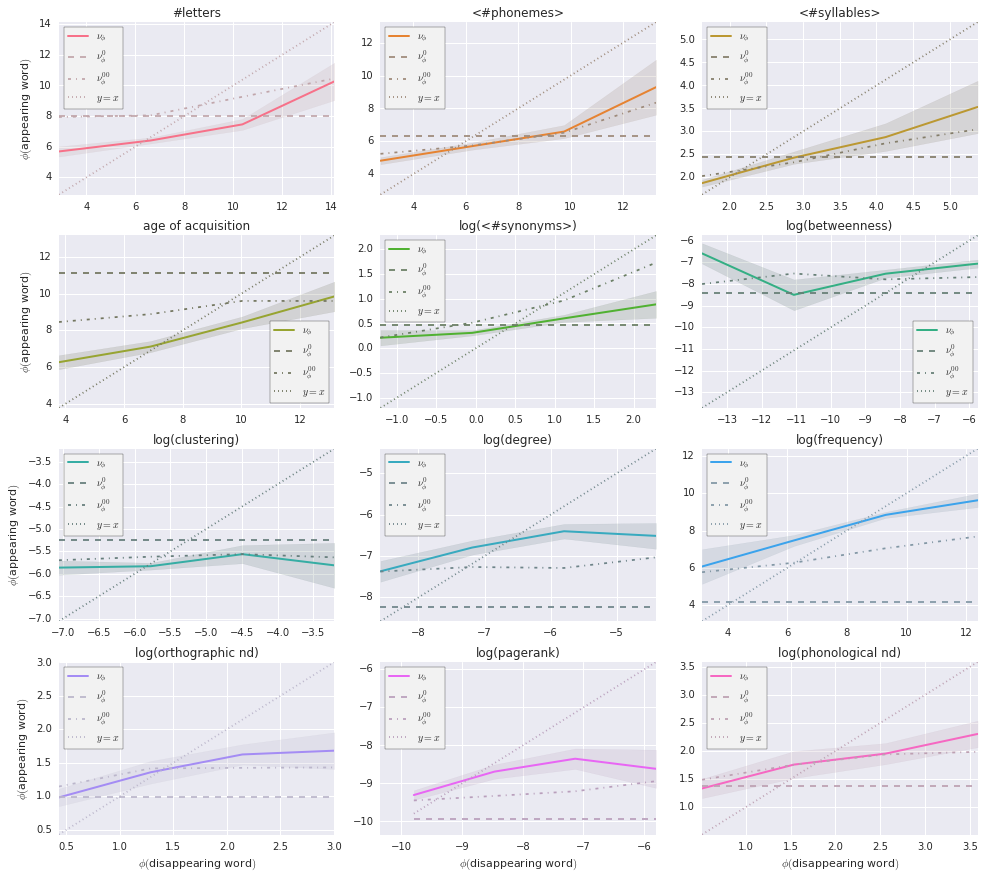

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

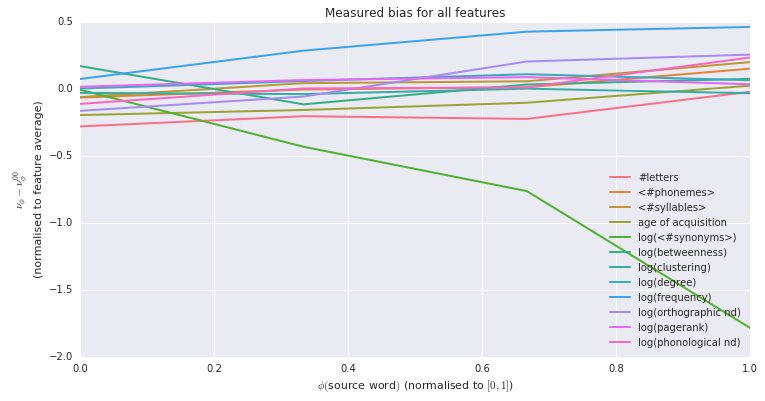

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *   | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | **  | ns. |


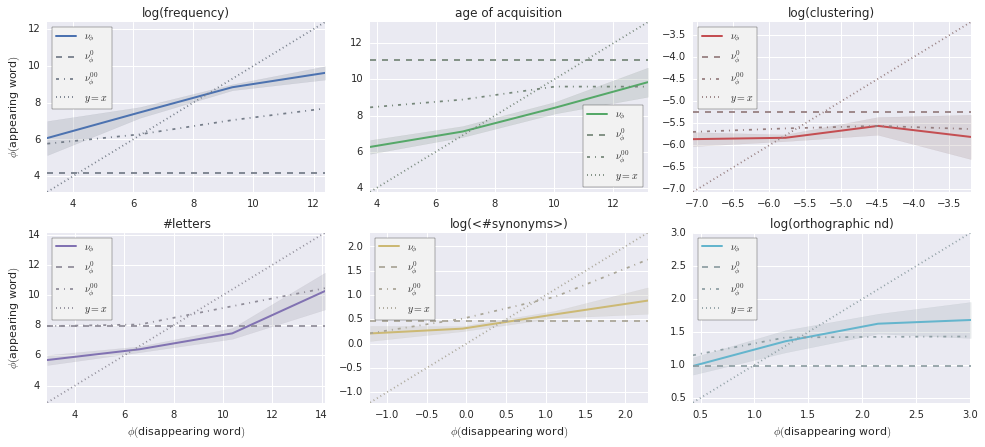

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

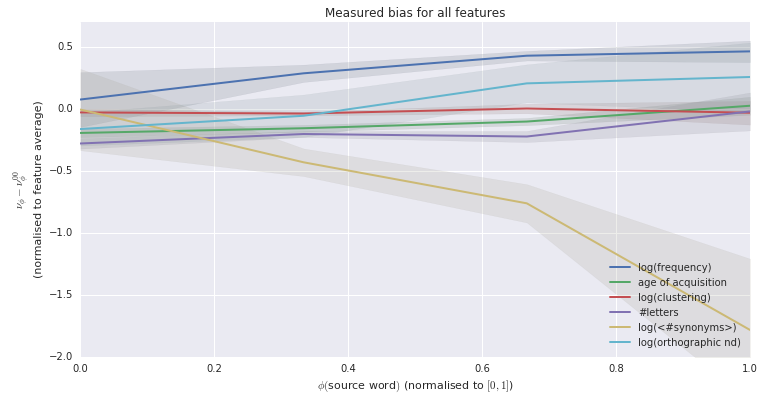

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | **  |
H_00 | *** | *   | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | **  |
H_00 | *   | *** | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | **  | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | ns. | **  |


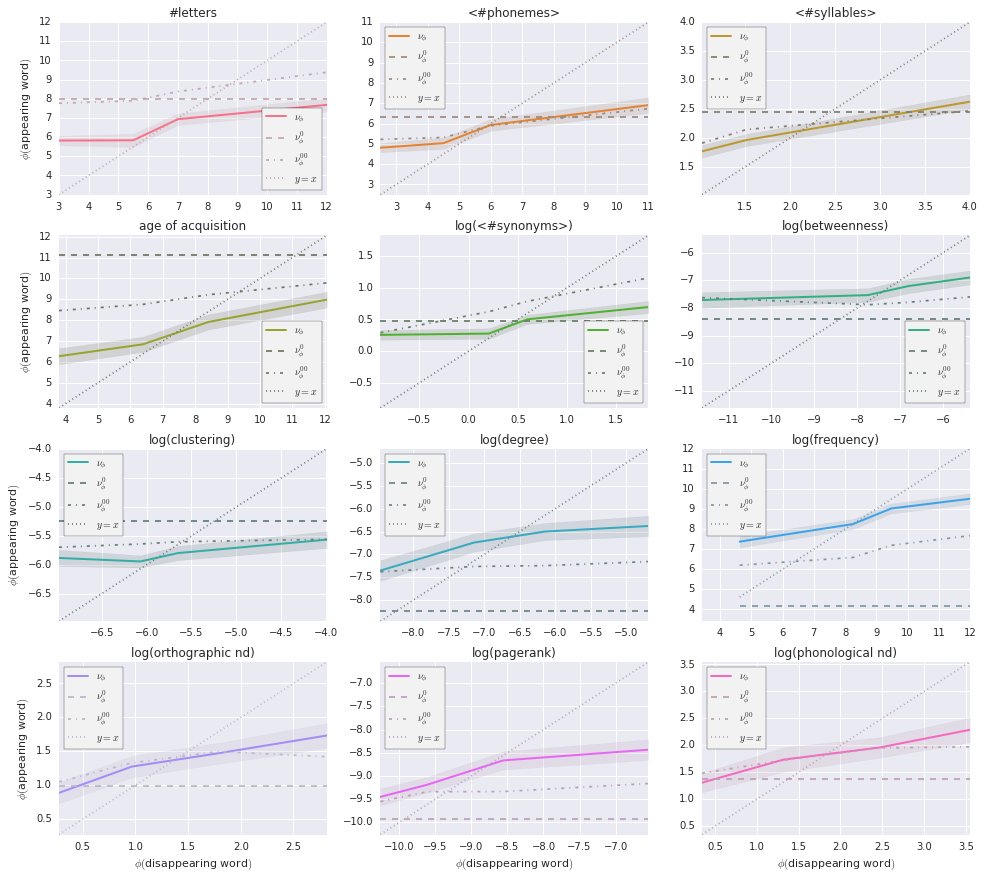

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

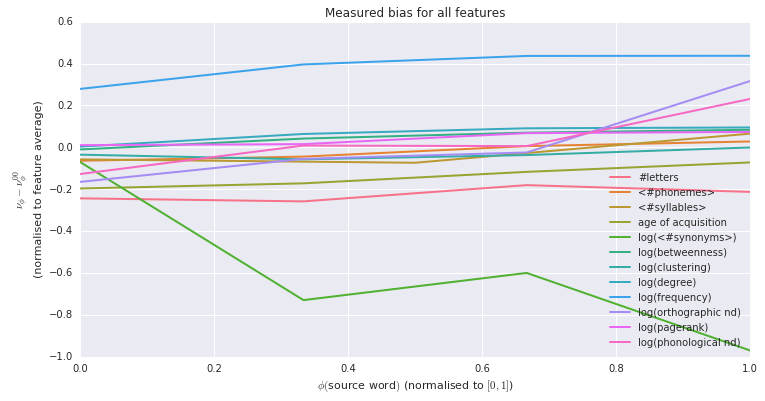

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | **  | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | ns. | ns. | **  |


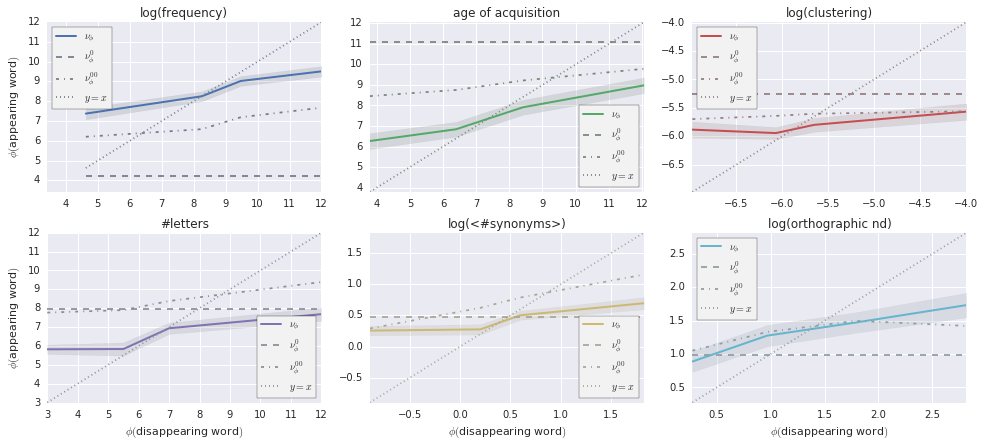

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

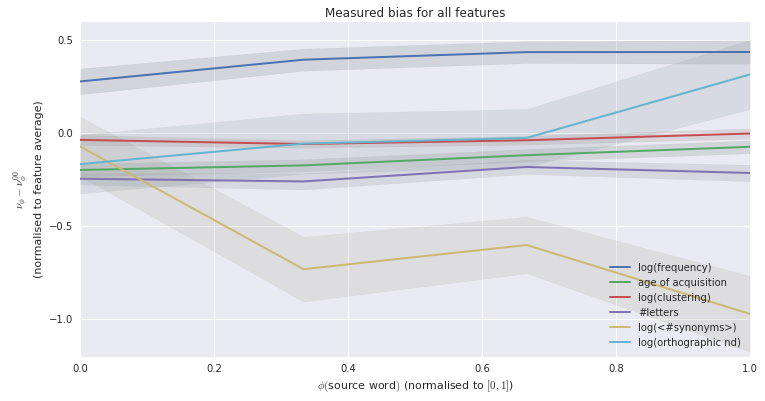

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *** |


H_00 | ns. | **  | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | **  | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |


H_00 | **  | ns. | *   | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | *   | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *   | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *   | ns. | ns. |


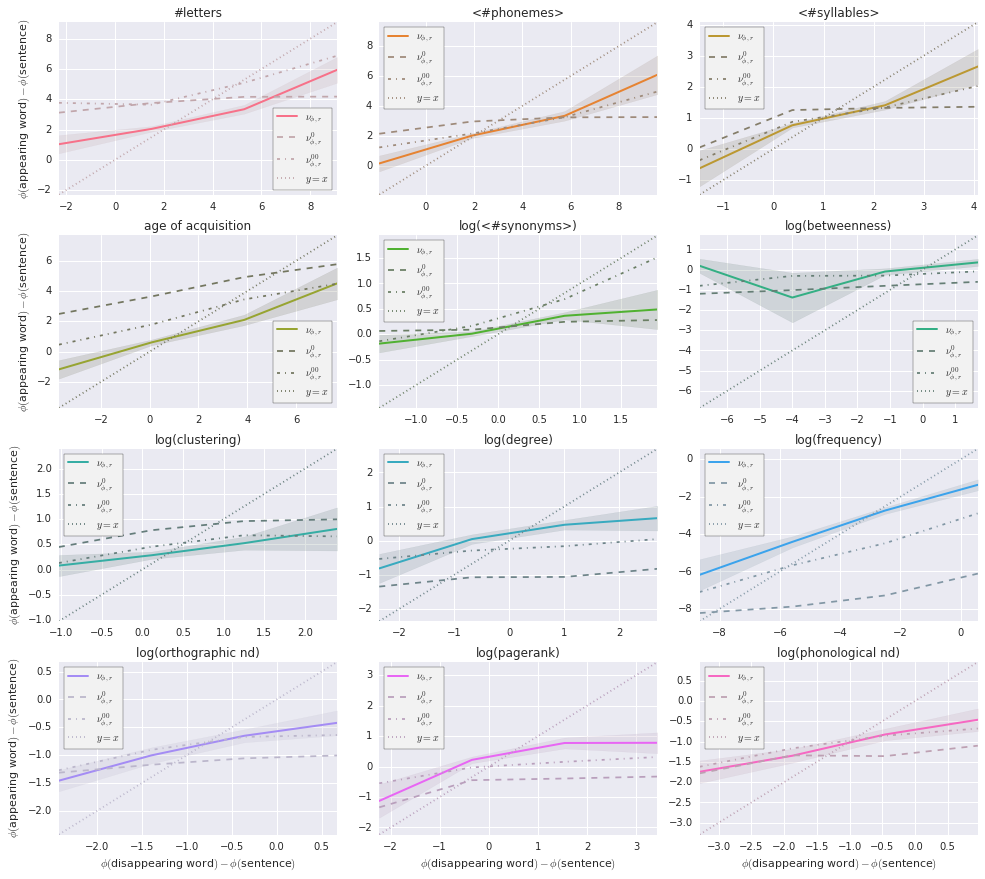

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

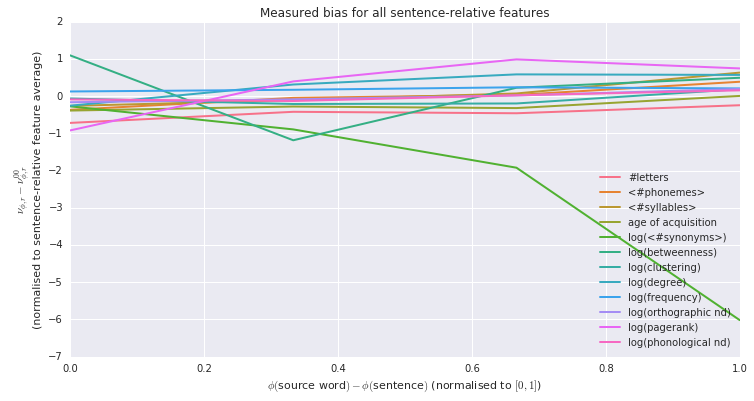

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | ns. | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | **  | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


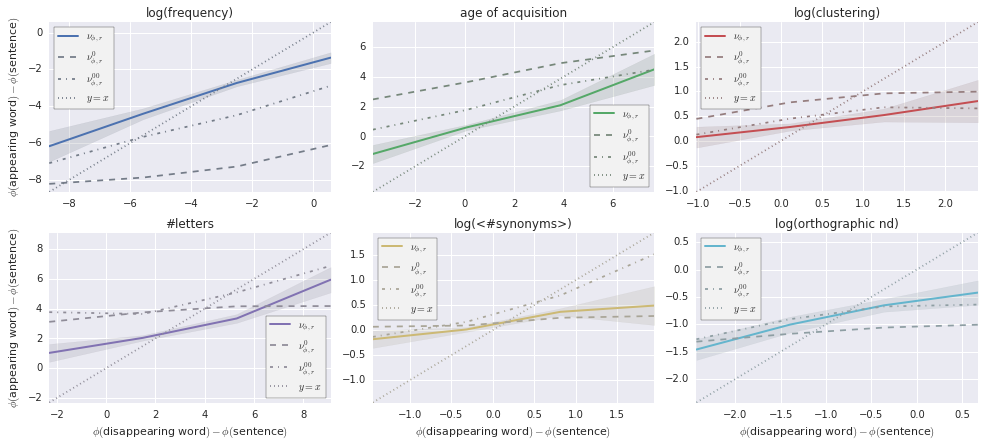

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

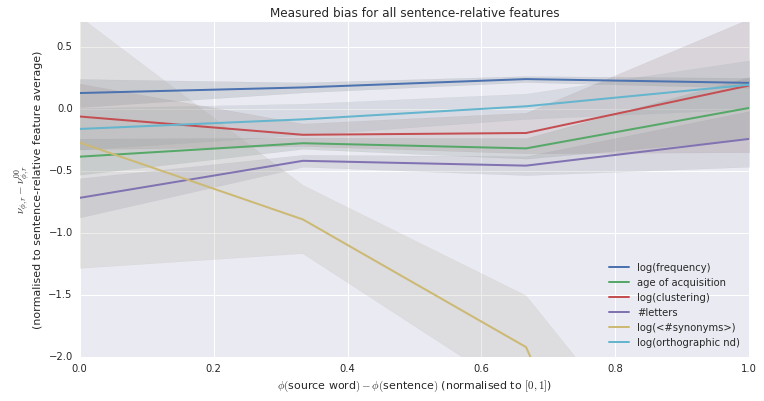

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *   | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |


H_00 | *   | **  | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *   | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | *   | ns. | ns. | ns. |


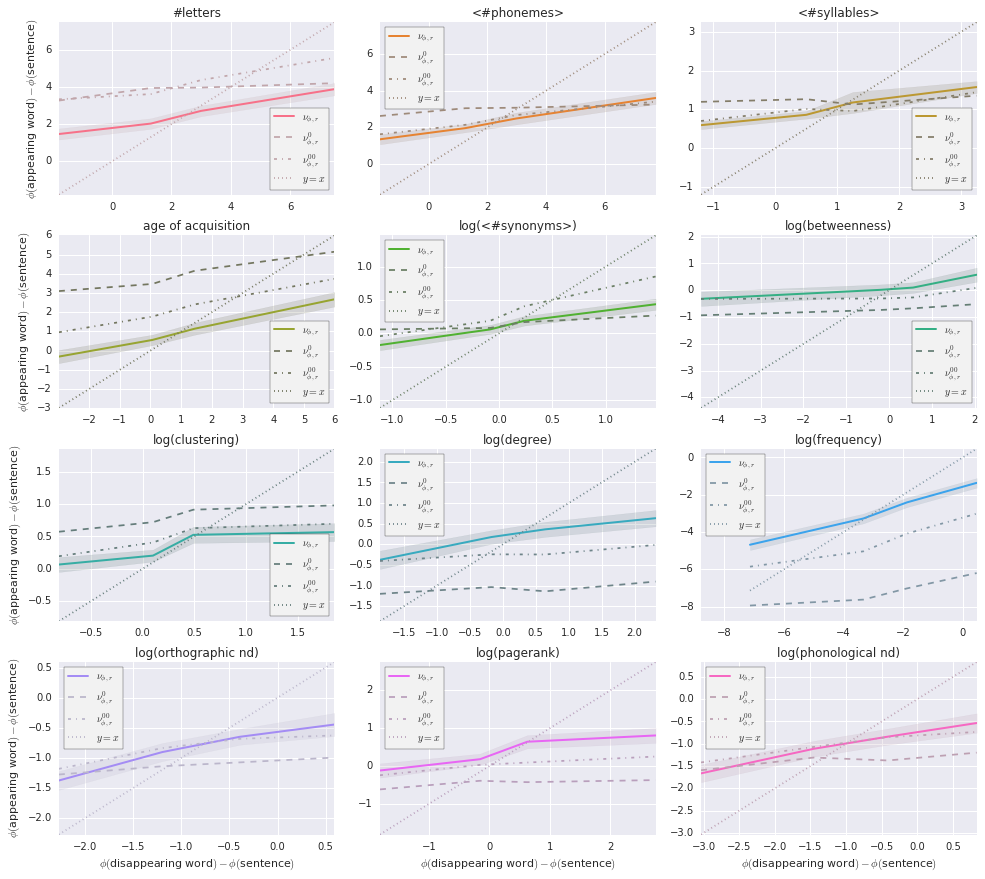

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

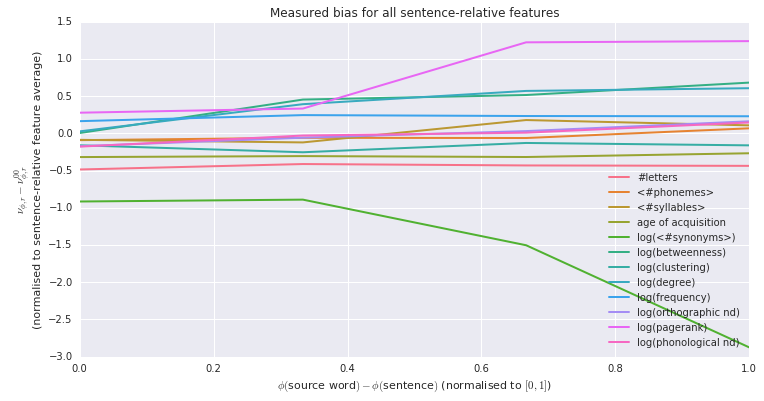

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | ns. |


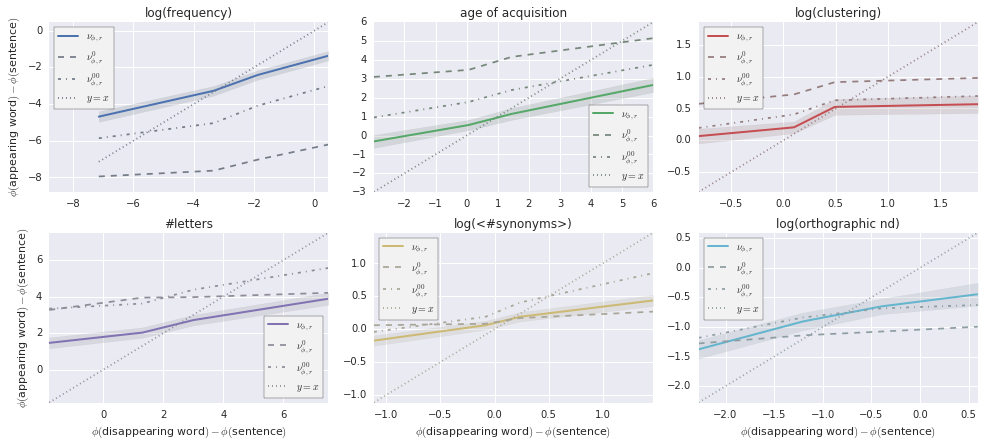

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

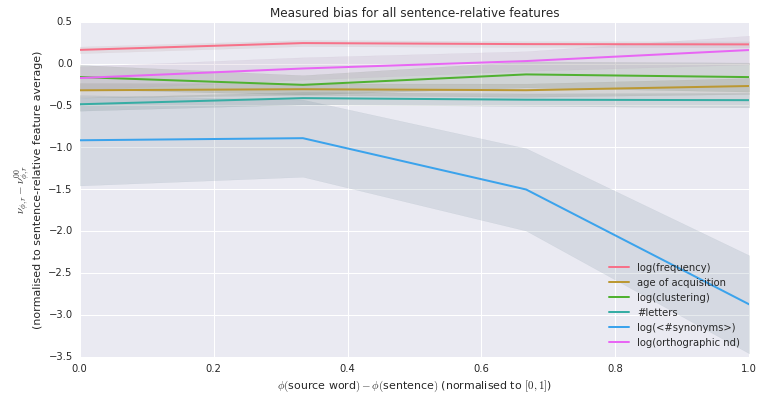

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


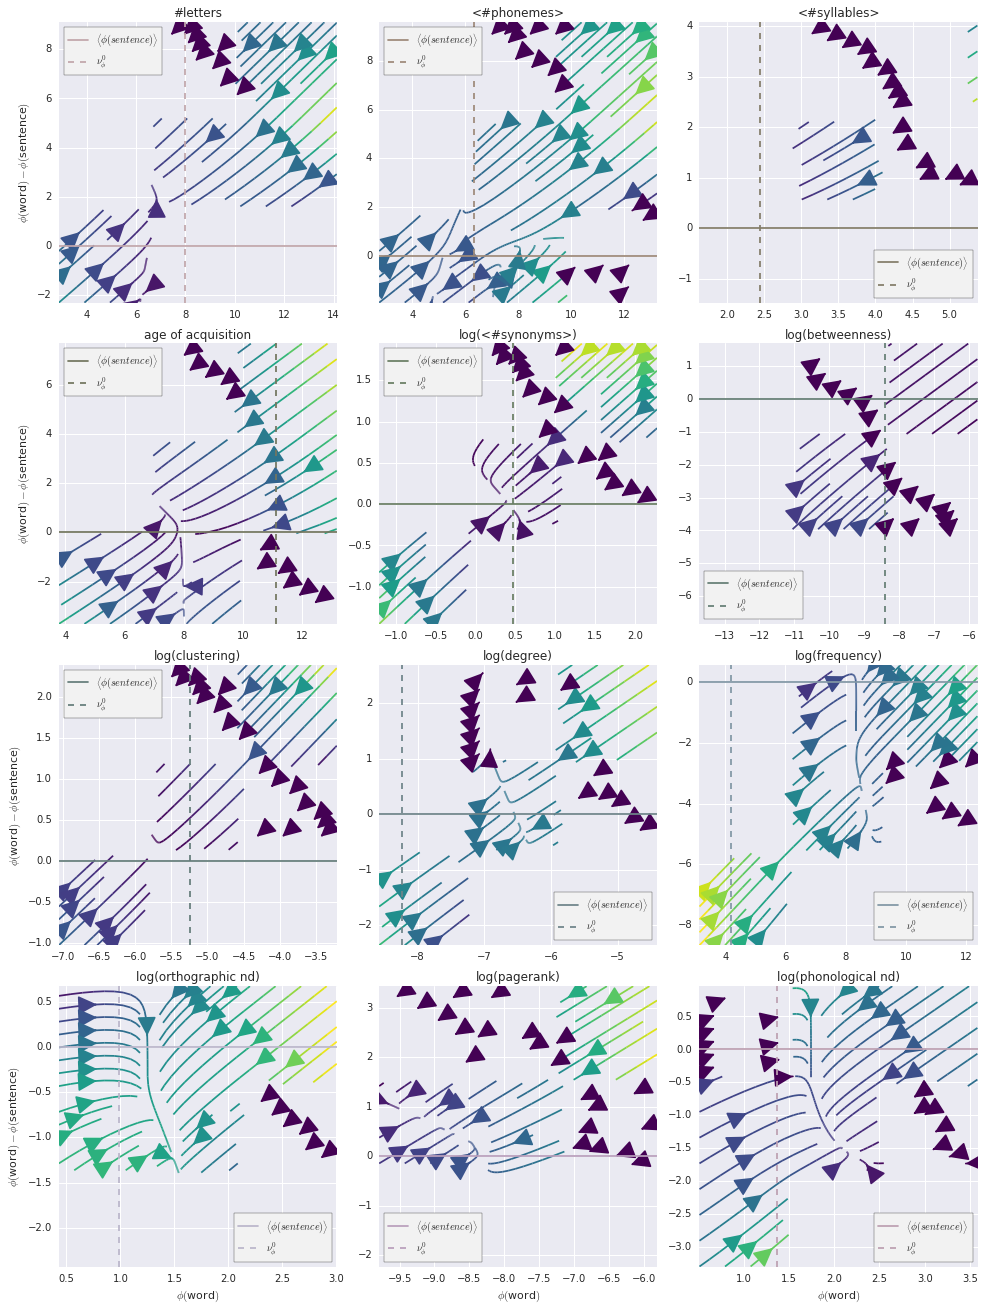

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


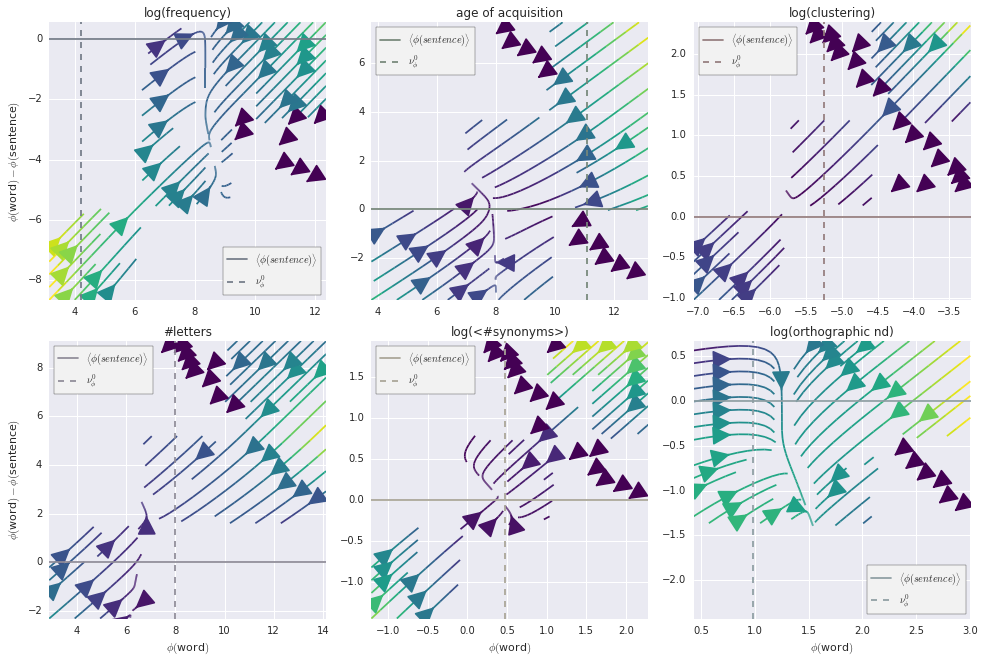

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55115339  0.17234795  0.07061871  0.067473    0.03493769  0.02771825
  0.01982055  0.01816898  0.01662463  0.00888034]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.492536,0.245053,-0.083349,0.233805,0.208931,-0.444263,0.210971,0.259477,-0.419619,0.280918,-0.166831,0.007668
Component-1,-0.401424,0.379412,-0.131081,0.278762,0.232779,0.413616,-0.150501,0.287124,0.438726,-0.223368,0.164785,-0.011405
Component-2,-0.735882,-0.395810,0.114177,-0.160664,-0.454498,0.065925,0.001995,-0.170841,0.019352,-0.137722,0.022946,0.054674


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 9180) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 9180) |                      | Elapsed Time: 0:00:44 ETA: 12:34:03

  0% (  31 of 9180) |                       | Elapsed Time: 0:00:44 ETA: 3:39:25

  0% (  58 of 9180) |                       | Elapsed Time: 0:00:44 ETA: 1:57:27

  0% (  82 of 9180) |                       | Elapsed Time: 0:00:45 ETA: 1:23:14

  1% ( 115 of 9180) |                       | Elapsed Time: 0:00:45 ETA: 0:01:18

  1% ( 142 of 9180) |                       | Elapsed Time: 0:00:45 ETA: 0:01:14

  1% ( 167 of 9180) |                       | Elapsed Time: 0:00:45 ETA: 0:01:11

  2% ( 195 of 9180) |                       | Elapsed Time: 0:00:45 ETA: 0:01:11

  2% ( 230 of 9180) |                       | Elapsed Time: 0:00:46 ETA: 0:01:09

  2% ( 257 of 9180) |                       | Elapsed Time: 0:00:46 ETA: 0:01:10

  3% ( 283 of 9180) |                       | Elapsed Time: 0:00:46 ETA: 0:01:08

  3% ( 309 of 9180) |                       | Elapsed Time: 0:00:46 ETA: 0:01:08

  3% ( 345 of 9180) |                       | Elapsed Time: 0:00:47 ETA: 0:01:09

  4% ( 370 of 9180) |                       | Elapsed Time: 0:00:47 ETA: 0:01:11

  4% ( 395 of 9180) |                       | Elapsed Time: 0:00:47 ETA: 0:01:11

  4% ( 421 of 9180) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:11

  4% ( 446 of 9180) |#                      | Elapsed Time: 0:00:47 ETA: 0:01:12

  5% ( 459 of 9180) |#                      | Elapsed Time: 0:00:48 ETA: 0:01:22

  5% ( 472 of 9180) |#                      | Elapsed Time: 0:00:48 ETA: 0:01:37

  5% ( 490 of 9180) |#                      | Elapsed Time: 0:00:48 ETA: 0:01:46

  5% ( 510 of 9180) |#                      | Elapsed Time: 0:00:48 ETA: 0:01:53

  5% ( 539 of 9180) |#                      | Elapsed Time: 0:00:49 ETA: 0:01:38

  6% ( 574 of 9180) |#                      | Elapsed Time: 0:00:49 ETA: 0:01:16

  6% ( 604 of 9180) |#                      | Elapsed Time: 0:00:49 ETA: 0:01:07

  6% ( 624 of 9180) |#                      | Elapsed Time: 0:00:49 ETA: 0:01:06

  7% ( 644 of 9180) |#                      | Elapsed Time: 0:00:49 ETA: 0:01:09

  7% ( 664 of 9180) |#                      | Elapsed Time: 0:00:50 ETA: 0:01:17

  7% ( 689 of 9180) |#                      | Elapsed Time: 0:00:50 ETA: 0:01:28

  7% ( 708 of 9180) |#                      | Elapsed Time: 0:00:50 ETA: 0:01:32

  7% ( 728 of 9180) |#                      | Elapsed Time: 0:00:50 ETA: 0:01:32

  8% ( 748 of 9180) |#                      | Elapsed Time: 0:00:51 ETA: 0:01:32

  8% ( 768 of 9180) |#                      | Elapsed Time: 0:00:51 ETA: 0:01:32

  8% ( 788 of 9180) |#                      | Elapsed Time: 0:00:51 ETA: 0:01:31

  8% ( 814 of 9180) |##                     | Elapsed Time: 0:00:51 ETA: 0:01:31

  9% ( 834 of 9180) |##                     | Elapsed Time: 0:00:51 ETA: 0:01:31

  9% ( 853 of 9180) |##                     | Elapsed Time: 0:00:52 ETA: 0:01:31

  9% ( 873 of 9180) |##                     | Elapsed Time: 0:00:52 ETA: 0:01:31

  9% ( 893 of 9180) |##                     | Elapsed Time: 0:00:52 ETA: 0:01:31

 10% ( 918 of 9180) |##                     | Elapsed Time: 0:00:52 ETA: 0:01:29

 10% ( 941 of 9180) |##                     | Elapsed Time: 0:00:53 ETA: 0:01:25

 10% ( 963 of 9180) |##                     | Elapsed Time: 0:00:53 ETA: 0:01:22

 10% ( 985 of 9180) |##                     | Elapsed Time: 0:00:53 ETA: 0:01:20

 10% (1009 of 9180) |##                     | Elapsed Time: 0:00:53 ETA: 0:01:17

 11% (1033 of 9180) |##                     | Elapsed Time: 0:00:53 ETA: 0:01:15

 11% (1063 of 9180) |##                     | Elapsed Time: 0:00:54 ETA: 0:01:10

 11% (1094 of 9180) |##                     | Elapsed Time: 0:00:54 ETA: 0:01:04

 12% (1124 of 9180) |##                     | Elapsed Time: 0:00:54 ETA: 0:01:00

 12% (1148 of 9180) |##                     | Elapsed Time: 0:00:54 ETA: 0:01:03

 12% (1168 of 9180) |##                     | Elapsed Time: 0:00:55 ETA: 0:01:08

 12% (1188 of 9180) |##                     | Elapsed Time: 0:00:55 ETA: 0:01:15

 13% (1208 of 9180) |###                    | Elapsed Time: 0:00:55 ETA: 0:01:23

 13% (1228 of 9180) |###                    | Elapsed Time: 0:00:55 ETA: 0:01:23

 13% (1248 of 9180) |###                    | Elapsed Time: 0:00:55 ETA: 0:01:23

 13% (1274 of 9180) |###                    | Elapsed Time: 0:00:56 ETA: 0:01:21

 14% (1298 of 9180) |###                    | Elapsed Time: 0:00:56 ETA: 0:01:17

 14% (1325 of 9180) |###                    | Elapsed Time: 0:00:56 ETA: 0:01:12

 14% (1357 of 9180) |###                    | Elapsed Time: 0:00:56 ETA: 0:01:04

 15% (1394 of 9180) |###                    | Elapsed Time: 0:00:57 ETA: 0:00:57

 15% (1420 of 9180) |###                    | Elapsed Time: 0:00:57 ETA: 0:00:55

 15% (1437 of 9180) |###                    | Elapsed Time: 0:00:57 ETA: 0:00:58

 15% (1463 of 9180) |###                    | Elapsed Time: 0:00:57 ETA: 0:00:59

 16% (1492 of 9180) |###                    | Elapsed Time: 0:00:57 ETA: 0:01:04

 16% (1518 of 9180) |###                    | Elapsed Time: 0:00:58 ETA: 0:01:08

 16% (1538 of 9180) |###                    | Elapsed Time: 0:00:58 ETA: 0:01:09

 17% (1571 of 9180) |###                    | Elapsed Time: 0:00:58 ETA: 0:01:00

 17% (1607 of 9180) |####                   | Elapsed Time: 0:00:58 ETA: 0:00:58

 17% (1633 of 9180) |####                   | Elapsed Time: 0:00:58 ETA: 0:00:57

 18% (1659 of 9180) |####                   | Elapsed Time: 0:00:59 ETA: 0:00:56

 18% (1684 of 9180) |####                   | Elapsed Time: 0:00:59 ETA: 0:00:56

 18% (1712 of 9180) |####                   | Elapsed Time: 0:00:59 ETA: 0:00:57

 18% (1736 of 9180) |####                   | Elapsed Time: 0:00:59 ETA: 0:01:00

 19% (1764 of 9180) |####                   | Elapsed Time: 0:01:00 ETA: 0:00:59

 19% (1792 of 9180) |####                   | Elapsed Time: 0:01:00 ETA: 0:00:57

 19% (1821 of 9180) |####                   | Elapsed Time: 0:01:00 ETA: 0:00:56

 20% (1852 of 9180) |####                   | Elapsed Time: 0:01:00 ETA: 0:00:55

 20% (1879 of 9180) |####                   | Elapsed Time: 0:01:00 ETA: 0:00:56

 20% (1906 of 9180) |####                   | Elapsed Time: 0:01:01 ETA: 0:00:56

 21% (1934 of 9180) |####                   | Elapsed Time: 0:01:01 ETA: 0:00:56

 21% (1965 of 9180) |####                   | Elapsed Time: 0:01:01 ETA: 0:00:54

 21% (1993 of 9180) |####                   | Elapsed Time: 0:01:01 ETA: 0:00:54

 22% (2022 of 9180) |#####                  | Elapsed Time: 0:01:01 ETA: 0:00:52

 22% (2050 of 9180) |#####                  | Elapsed Time: 0:01:02 ETA: 0:00:51

 22% (2080 of 9180) |#####                  | Elapsed Time: 0:01:02 ETA: 0:00:51

 22% (2108 of 9180) |#####                  | Elapsed Time: 0:01:02 ETA: 0:00:51

 23% (2136 of 9180) |#####                  | Elapsed Time: 0:01:02 ETA: 0:00:52

 23% (2155 of 9180) |#####                  | Elapsed Time: 0:01:03 ETA: 0:00:55

 23% (2181 of 9180) |#####                  | Elapsed Time: 0:01:03 ETA: 0:01:00

 24% (2208 of 9180) |#####                  | Elapsed Time: 0:01:03 ETA: 0:01:00

 24% (2230 of 9180) |#####                  | Elapsed Time: 0:01:03 ETA: 0:01:05

 24% (2256 of 9180) |#####                  | Elapsed Time: 0:01:03 ETA: 0:01:03

 24% (2278 of 9180) |#####                  | Elapsed Time: 0:01:04 ETA: 0:01:01

 25% (2310 of 9180) |#####                  | Elapsed Time: 0:01:04 ETA: 0:00:57

 25% (2338 of 9180) |#####                  | Elapsed Time: 0:01:04 ETA: 0:00:54

 25% (2367 of 9180) |#####                  | Elapsed Time: 0:01:04 ETA: 0:00:52

 26% (2392 of 9180) |#####                  | Elapsed Time: 0:01:04 ETA: 0:00:51

 26% (2427 of 9180) |######                 | Elapsed Time: 0:01:05 ETA: 0:00:49

 26% (2457 of 9180) |######                 | Elapsed Time: 0:01:05 ETA: 0:00:49

 27% (2484 of 9180) |######                 | Elapsed Time: 0:01:05 ETA: 0:00:49

 27% (2525 of 9180) |######                 | Elapsed Time: 0:01:05 ETA: 0:00:49

 27% (2558 of 9180) |######                 | Elapsed Time: 0:01:06 ETA: 0:00:45

 28% (2585 of 9180) |######                 | Elapsed Time: 0:01:06 ETA: 0:00:47

 28% (2610 of 9180) |######                 | Elapsed Time: 0:01:06 ETA: 0:00:48

 28% (2626 of 9180) |######                 | Elapsed Time: 0:01:06 ETA: 0:00:52

 28% (2655 of 9180) |######                 | Elapsed Time: 0:01:07 ETA: 0:00:57

 29% (2686 of 9180) |######                 | Elapsed Time: 0:01:07 ETA: 0:00:56

 29% (2716 of 9180) |######                 | Elapsed Time: 0:01:07 ETA: 0:00:54

 30% (2754 of 9180) |######                 | Elapsed Time: 0:01:07 ETA: 0:00:48

 30% (2788 of 9180) |######                 | Elapsed Time: 0:01:07 ETA: 0:00:42

 30% (2822 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:00:40

 31% (2869 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:00:39

 31% (2903 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:00:38

 31% (2935 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:00:38

 32% (2962 of 9180) |#######                | Elapsed Time: 0:01:08 ETA: 0:00:39

 32% (2997 of 9180) |#######                | Elapsed Time: 0:01:09 ETA: 0:00:41

 32% (3015 of 9180) |#######                | Elapsed Time: 0:01:09 ETA: 0:00:47

 33% (3044 of 9180) |#######                | Elapsed Time: 0:01:09 ETA: 0:00:48

 33% (3076 of 9180) |#######                | Elapsed Time: 0:01:09 ETA: 0:00:47

 33% (3111 of 9180) |#######                | Elapsed Time: 0:01:10 ETA: 0:00:47

 34% (3145 of 9180) |#######                | Elapsed Time: 0:01:10 ETA: 0:00:43

 34% (3171 of 9180) |#######                | Elapsed Time: 0:01:10 ETA: 0:00:42

 34% (3199 of 9180) |########               | Elapsed Time: 0:01:10 ETA: 0:00:43

 35% (3226 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:00:44

 35% (3252 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:00:46

 35% (3278 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:00:47

 35% (3297 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:00:51

 36% (3328 of 9180) |########               | Elapsed Time: 0:01:11 ETA: 0:00:49

 36% (3355 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:00:48

 36% (3384 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:00:46

 37% (3408 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:00:46

 37% (3443 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:00:45

 37% (3468 of 9180) |########               | Elapsed Time: 0:01:12 ETA: 0:00:45

 38% (3493 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:00:46

 38% (3522 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:00:45

 38% (3546 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:00:44

 38% (3569 of 9180) |########               | Elapsed Time: 0:01:13 ETA: 0:00:46

 39% (3589 of 9180) |########               | Elapsed Time: 0:01:14 ETA: 0:00:47

 39% (3619 of 9180) |#########              | Elapsed Time: 0:01:14 ETA: 0:00:46

 39% (3648 of 9180) |#########              | Elapsed Time: 0:01:14 ETA: 0:00:45

 40% (3672 of 9180) |#########              | Elapsed Time: 0:01:14 ETA: 0:00:45

 40% (3697 of 9180) |#########              | Elapsed Time: 0:01:14 ETA: 0:00:44

 40% (3722 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:00:43

 40% (3750 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:00:45

 41% (3775 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:00:45

 41% (3795 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:00:45

 41% (3826 of 9180) |#########              | Elapsed Time: 0:01:15 ETA: 0:00:42

 42% (3857 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:00:41

 42% (3885 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:00:41

 42% (3915 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:00:39

 42% (3942 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:00:37

 43% (3968 of 9180) |#########              | Elapsed Time: 0:01:16 ETA: 0:00:39

 43% (3996 of 9180) |##########             | Elapsed Time: 0:01:17 ETA: 0:00:39

 43% (4029 of 9180) |##########             | Elapsed Time: 0:01:17 ETA: 0:00:41

 44% (4053 of 9180) |##########             | Elapsed Time: 0:01:17 ETA: 0:00:41

 44% (4075 of 9180) |##########             | Elapsed Time: 0:01:17 ETA: 0:00:42

 44% (4091 of 9180) |##########             | Elapsed Time: 0:01:18 ETA: 0:00:48

 44% (4108 of 9180) |##########             | Elapsed Time: 0:01:18 ETA: 0:00:51

 45% (4131 of 9180) |##########             | Elapsed Time: 0:01:18 ETA: 0:00:54

 45% (4154 of 9180) |##########             | Elapsed Time: 0:01:18 ETA: 0:00:53

 45% (4183 of 9180) |##########             | Elapsed Time: 0:01:18 ETA: 0:00:49

 45% (4206 of 9180) |##########             | Elapsed Time: 0:01:19 ETA: 0:00:44

 46% (4227 of 9180) |##########             | Elapsed Time: 0:01:19 ETA: 0:00:44

 46% (4254 of 9180) |##########             | Elapsed Time: 0:01:19 ETA: 0:00:42

 46% (4266 of 9180) |##########             | Elapsed Time: 0:01:19 ETA: 0:00:48

 46% (4278 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:00:57

 46% (4290 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:02

 46% (4307 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:12

 47% (4331 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:01:03

 47% (4361 of 9180) |##########             | Elapsed Time: 0:01:20 ETA: 0:00:51

 47% (4391 of 9180) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:42

 48% (4422 of 9180) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:35

 48% (4453 of 9180) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:33

 48% (4488 of 9180) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:32

 49% (4510 of 9180) |###########            | Elapsed Time: 0:01:21 ETA: 0:00:34

 49% (4534 of 9180) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:36

 49% (4566 of 9180) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:35

 50% (4590 of 9180) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:37

 50% (4623 of 9180) |###########            | Elapsed Time: 0:01:22 ETA: 0:00:35

 50% (4649 of 9180) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:33

 50% (4668 of 9180) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:36

 51% (4691 of 9180) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:37

 51% (4717 of 9180) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:38

 51% (4736 of 9180) |###########            | Elapsed Time: 0:01:23 ETA: 0:00:41

 51% (4766 of 9180) |###########            | Elapsed Time: 0:01:24 ETA: 0:00:39

 52% (4794 of 9180) |############           | Elapsed Time: 0:01:24 ETA: 0:00:36

 52% (4820 of 9180) |############           | Elapsed Time: 0:01:24 ETA: 0:00:37

 52% (4847 of 9180) |############           | Elapsed Time: 0:01:24 ETA: 0:00:35

 53% (4872 of 9180) |############           | Elapsed Time: 0:01:24 ETA: 0:00:35

 53% (4899 of 9180) |############           | Elapsed Time: 0:01:25 ETA: 0:00:36

 53% (4923 of 9180) |############           | Elapsed Time: 0:01:25 ETA: 0:00:34

 53% (4949 of 9180) |############           | Elapsed Time: 0:01:25 ETA: 0:00:35

 54% (4975 of 9180) |############           | Elapsed Time: 0:01:25 ETA: 0:00:35

 54% (5004 of 9180) |############           | Elapsed Time: 0:01:26 ETA: 0:00:34

 54% (5025 of 9180) |############           | Elapsed Time: 0:01:26 ETA: 0:00:35

 55% (5049 of 9180) |############           | Elapsed Time: 0:01:26 ETA: 0:00:36

 55% (5076 of 9180) |############           | Elapsed Time: 0:01:26 ETA: 0:00:36

 55% (5109 of 9180) |############           | Elapsed Time: 0:01:26 ETA: 0:00:34

 55% (5139 of 9180) |############           | Elapsed Time: 0:01:27 ETA: 0:00:33

 56% (5174 of 9180) |############           | Elapsed Time: 0:01:27 ETA: 0:00:30

 56% (5194 of 9180) |#############          | Elapsed Time: 0:01:27 ETA: 0:00:29

 56% (5214 of 9180) |#############          | Elapsed Time: 0:01:27 ETA: 0:00:32

 56% (5230 of 9180) |#############          | Elapsed Time: 0:01:28 ETA: 0:00:37

 57% (5252 of 9180) |#############          | Elapsed Time: 0:01:28 ETA: 0:00:40

 57% (5279 of 9180) |#############          | Elapsed Time: 0:01:28 ETA: 0:00:40

 57% (5301 of 9180) |#############          | Elapsed Time: 0:01:28 ETA: 0:00:39

 58% (5331 of 9180) |#############          | Elapsed Time: 0:01:28 ETA: 0:00:35

 58% (5359 of 9180) |#############          | Elapsed Time: 0:01:29 ETA: 0:00:32

 58% (5394 of 9180) |#############          | Elapsed Time: 0:01:29 ETA: 0:00:32

 59% (5424 of 9180) |#############          | Elapsed Time: 0:01:29 ETA: 0:00:29

 59% (5457 of 9180) |#############          | Elapsed Time: 0:01:29 ETA: 0:00:27

 59% (5472 of 9180) |#############          | Elapsed Time: 0:01:30 ETA: 0:00:30

 59% (5482 of 9180) |#############          | Elapsed Time: 0:01:30 ETA: 0:00:33

 59% (5496 of 9180) |#############          | Elapsed Time: 0:01:30 ETA: 0:00:38

 60% (5516 of 9180) |#############          | Elapsed Time: 0:01:30 ETA: 0:00:47

 60% (5541 of 9180) |#############          | Elapsed Time: 0:01:30 ETA: 0:00:47

 60% (5567 of 9180) |#############          | Elapsed Time: 0:01:31 ETA: 0:00:38

 60% (5597 of 9180) |##############         | Elapsed Time: 0:01:31 ETA: 0:00:32

 61% (5623 of 9180) |##############         | Elapsed Time: 0:01:31 ETA: 0:00:29

 61% (5633 of 9180) |##############         | Elapsed Time: 0:01:31 ETA: 0:00:31

 61% (5657 of 9180) |##############         | Elapsed Time: 0:01:32 ETA: 0:00:33

 61% (5680 of 9180) |##############         | Elapsed Time: 0:01:32 ETA: 0:00:34

 62% (5707 of 9180) |##############         | Elapsed Time: 0:01:32 ETA: 0:00:34

 62% (5738 of 9180) |##############         | Elapsed Time: 0:01:32 ETA: 0:00:29

 62% (5770 of 9180) |##############         | Elapsed Time: 0:01:32 ETA: 0:00:25

 63% (5804 of 9180) |##############         | Elapsed Time: 0:01:33 ETA: 0:00:22

 63% (5832 of 9180) |##############         | Elapsed Time: 0:01:33 ETA: 0:00:22

 63% (5862 of 9180) |##############         | Elapsed Time: 0:01:33 ETA: 0:00:24

 64% (5886 of 9180) |##############         | Elapsed Time: 0:01:33 ETA: 0:00:25

 64% (5917 of 9180) |##############         | Elapsed Time: 0:01:33 ETA: 0:00:25

 64% (5941 of 9180) |##############         | Elapsed Time: 0:01:34 ETA: 0:00:27

 65% (5981 of 9180) |##############         | Elapsed Time: 0:01:34 ETA: 0:00:26

 65% (6010 of 9180) |###############        | Elapsed Time: 0:01:34 ETA: 0:00:23

 65% (6032 of 9180) |###############        | Elapsed Time: 0:01:34 ETA: 0:00:24

 66% (6061 of 9180) |###############        | Elapsed Time: 0:01:35 ETA: 0:00:24

 66% (6096 of 9180) |###############        | Elapsed Time: 0:01:35 ETA: 0:00:23

 66% (6125 of 9180) |###############        | Elapsed Time: 0:01:35 ETA: 0:00:23

 67% (6152 of 9180) |###############        | Elapsed Time: 0:01:35 ETA: 0:00:23

 67% (6176 of 9180) |###############        | Elapsed Time: 0:01:35 ETA: 0:00:23

 67% (6209 of 9180) |###############        | Elapsed Time: 0:01:36 ETA: 0:00:23

 67% (6228 of 9180) |###############        | Elapsed Time: 0:01:36 ETA: 0:00:24

 68% (6262 of 9180) |###############        | Elapsed Time: 0:01:36 ETA: 0:00:23

 68% (6291 of 9180) |###############        | Elapsed Time: 0:01:36 ETA: 0:00:22

 68% (6312 of 9180) |###############        | Elapsed Time: 0:01:37 ETA: 0:00:23

 69% (6335 of 9180) |###############        | Elapsed Time: 0:01:37 ETA: 0:00:22

 69% (6363 of 9180) |###############        | Elapsed Time: 0:01:37 ETA: 0:00:22

 69% (6389 of 9180) |################       | Elapsed Time: 0:01:37 ETA: 0:00:22

 70% (6426 of 9180) |################       | Elapsed Time: 0:01:37 ETA: 0:00:21

 70% (6449 of 9180) |################       | Elapsed Time: 0:01:38 ETA: 0:00:21

 70% (6475 of 9180) |################       | Elapsed Time: 0:01:38 ETA: 0:00:21

 70% (6504 of 9180) |################       | Elapsed Time: 0:01:38 ETA: 0:00:21

 71% (6541 of 9180) |################       | Elapsed Time: 0:01:38 ETA: 0:00:20

 71% (6564 of 9180) |################       | Elapsed Time: 0:01:39 ETA: 0:00:20

 71% (6592 of 9180) |################       | Elapsed Time: 0:01:39 ETA: 0:00:19

 72% (6623 of 9180) |################       | Elapsed Time: 0:01:39 ETA: 0:00:19

 72% (6656 of 9180) |################       | Elapsed Time: 0:01:39 ETA: 0:00:19

 72% (6684 of 9180) |################       | Elapsed Time: 0:01:39 ETA: 0:00:18

 73% (6712 of 9180) |################       | Elapsed Time: 0:01:40 ETA: 0:00:17

 73% (6741 of 9180) |################       | Elapsed Time: 0:01:40 ETA: 0:00:17

 73% (6788 of 9180) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:16

 74% (6821 of 9180) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:15

 74% (6847 of 9180) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:16

 74% (6871 of 9180) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:16

 75% (6897 of 9180) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:17

 75% (6923 of 9180) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:19

 75% (6950 of 9180) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:19

 76% (6979 of 9180) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:18

 76% (7011 of 9180) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:17

 76% (7029 of 9180) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:18

 76% (7050 of 9180) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:18

 77% (7077 of 9180) |#################      | Elapsed Time: 0:01:43 ETA: 0:00:18

 77% (7100 of 9180) |#################      | Elapsed Time: 0:01:43 ETA: 0:00:19

 77% (7129 of 9180) |#################      | Elapsed Time: 0:01:43 ETA: 0:00:19

 77% (7156 of 9180) |#################      | Elapsed Time: 0:01:43 ETA: 0:00:17

 78% (7186 of 9180) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:16

 78% (7230 of 9180) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:15

 79% (7260 of 9180) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:13

 79% (7288 of 9180) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:13

 79% (7313 of 9180) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:13

 80% (7344 of 9180) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:13

 80% (7371 of 9180) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:14

 80% (7399 of 9180) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:14

 80% (7427 of 9180) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:13

 81% (7459 of 9180) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:13

 81% (7475 of 9180) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:13

 81% (7484 of 9180) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:16

 81% (7496 of 9180) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:19

 81% (7526 of 9180) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:19

 82% (7552 of 9180) |##################     | Elapsed Time: 0:01:47 ETA: 0:00:19

 82% (7591 of 9180) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:14

 82% (7618 of 9180) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:11

 83% (7644 of 9180) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:11

 83% (7672 of 9180) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:11

 83% (7704 of 9180) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:11

 84% (7722 of 9180) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:12

 84% (7736 of 9180) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:14

 84% (7748 of 9180) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:16

 84% (7780 of 9180) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:14

 85% (7812 of 9180) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:14

 85% (7837 of 9180) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:12

 85% (7864 of 9180) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:10

 85% (7892 of 9180) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:09

 86% (7918 of 9180) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:10

 86% (7947 of 9180) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:09

 86% (7973 of 9180) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:09

 87% (8002 of 9180) |####################   | Elapsed Time: 0:01:50 ETA: 0:00:08

 87% (8033 of 9180) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:09

 87% (8058 of 9180) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:08

 87% (8078 of 9180) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:09

 88% (8102 of 9180) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:09

 88% (8131 of 9180) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:09

 88% (8161 of 9180) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:08

 89% (8187 of 9180) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:08

 89% (8219 of 9180) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:07

 90% (8262 of 9180) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:06

 90% (8291 of 9180) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:06

 90% (8319 of 9180) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:06

 90% (8351 of 9180) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:05

 91% (8394 of 9180) |#####################  | Elapsed Time: 0:01:53 ETA: 0:00:05

 91% (8420 of 9180) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:05

 91% (8441 of 9180) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:05

 92% (8466 of 9180) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:05

 92% (8506 of 9180) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:05

 93% (8538 of 9180) |#####################  | Elapsed Time: 0:01:54 ETA: 0:00:05

 93% (8569 of 9180) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:04

 93% (8588 of 9180) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:04

 93% (8621 of 9180) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:04

 94% (8649 of 9180) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:04

 94% (8681 of 9180) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:03

 95% (8721 of 9180) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:03

 95% (8753 of 9180) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:02

 95% (8776 of 9180) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:02

 95% (8806 of 9180) |###################### | Elapsed Time: 0:01:56 ETA: 0:00:02

 96% (8836 of 9180) |###################### | Elapsed Time: 0:01:57 ETA: 0:00:02

 96% (8861 of 9180) |###################### | Elapsed Time: 0:01:57 ETA: 0:00:02

 96% (8885 of 9180) |###################### | Elapsed Time: 0:01:57 ETA: 0:00:02

 97% (8907 of 9180) |###################### | Elapsed Time: 0:01:57 ETA: 0:00:02

 97% (8951 of 9180) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:01

 97% (8974 of 9180) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:01

 98% (8998 of 9180) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:01

 98% (9023 of 9180) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:01

 98% (9047 of 9180) |###################### | Elapsed Time: 0:01:58 ETA: 0:00:01

 98% (9077 of 9180) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:00

 99% (9102 of 9180) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:00

 99% (9130 of 9180) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:00

 99% (9159 of 9180) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:00

100% (9180 of 9180) |######################| Elapsed Time: 0:01:59 Time: 0:01:59


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | **  | ns. | *** | **  |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | **  | ns. |


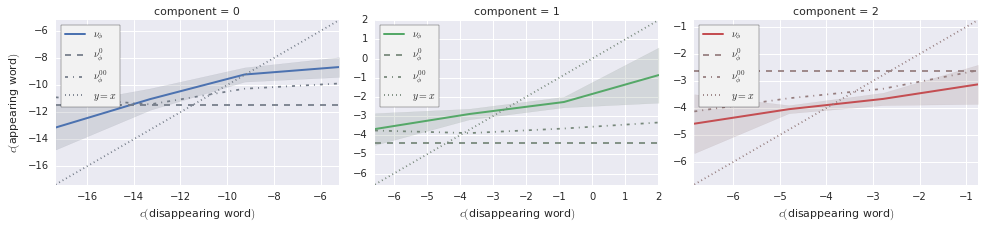

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.66968941  0.20311427]



,aoa,frequency,letters_count
Component-0,-0.734236,0.365789,-0.571922
Component-1,0.380226,-0.476344,-0.792795


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 9180) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  16 of 9180) |                       | Elapsed Time: 0:00:03 ETA: 0:29:22

  0% (  47 of 9180) |                       | Elapsed Time: 0:00:03 ETA: 0:10:38

  0% (  78 of 9180) |                       | Elapsed Time: 0:00:03 ETA: 0:06:47

  1% ( 115 of 9180) |                       | Elapsed Time: 0:00:03 ETA: 0:04:59

  1% ( 148 of 9180) |                       | Elapsed Time: 0:00:03 ETA: 0:00:58

  1% ( 178 of 9180) |                       | Elapsed Time: 0:00:04 ETA: 0:00:58

  2% ( 212 of 9180) |                       | Elapsed Time: 0:00:04 ETA: 0:00:57

  2% ( 247 of 9180) |                       | Elapsed Time: 0:00:04 ETA: 0:00:56

  3% ( 280 of 9180) |                       | Elapsed Time: 0:00:04 ETA: 0:00:57

  3% ( 312 of 9180) |                       | Elapsed Time: 0:00:04 ETA: 0:00:55

  3% ( 345 of 9180) |                       | Elapsed Time: 0:00:05 ETA: 0:00:55

  4% ( 377 of 9180) |                       | Elapsed Time: 0:00:05 ETA: 0:00:56

  4% ( 409 of 9180) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:57

  4% ( 441 of 9180) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:57

  5% ( 470 of 9180) |#                      | Elapsed Time: 0:00:06 ETA: 0:01:02

  5% ( 498 of 9180) |#                      | Elapsed Time: 0:00:06 ETA: 0:01:03

  5% ( 532 of 9180) |#                      | Elapsed Time: 0:00:06 ETA: 0:01:02

  6% ( 574 of 9180) |#                      | Elapsed Time: 0:00:06 ETA: 0:01:00

  6% ( 608 of 9180) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:57

  6% ( 634 of 9180) |#                      | Elapsed Time: 0:00:07 ETA: 0:00:55

  7% ( 660 of 9180) |#                      | Elapsed Time: 0:00:07 ETA: 0:00:56

  7% ( 689 of 9180) |#                      | Elapsed Time: 0:00:07 ETA: 0:01:00

  7% ( 715 of 9180) |#                      | Elapsed Time: 0:00:07 ETA: 0:01:04

  8% ( 741 of 9180) |#                      | Elapsed Time: 0:00:08 ETA: 0:01:06

  8% ( 767 of 9180) |#                      | Elapsed Time: 0:00:08 ETA: 0:01:05

  8% ( 804 of 9180) |##                     | Elapsed Time: 0:00:08 ETA: 0:01:05

  9% ( 830 of 9180) |##                     | Elapsed Time: 0:00:08 ETA: 0:01:05

  9% ( 856 of 9180) |##                     | Elapsed Time: 0:00:08 ETA: 0:01:04

  9% ( 882 of 9180) |##                     | Elapsed Time: 0:00:09 ETA: 0:01:04

 10% ( 918 of 9180) |##                     | Elapsed Time: 0:00:09 ETA: 0:01:03

 10% ( 949 of 9180) |##                     | Elapsed Time: 0:00:09 ETA: 0:01:00

 10% ( 979 of 9180) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:59

 11% (1010 of 9180) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:57

 11% (1050 of 9180) |##                     | Elapsed Time: 0:00:10 ETA: 0:00:54

 11% (1085 of 9180) |##                     | Elapsed Time: 0:00:10 ETA: 0:00:52

 12% (1119 of 9180) |##                     | Elapsed Time: 0:00:10 ETA: 0:00:50

 12% (1148 of 9180) |##                     | Elapsed Time: 0:00:10 ETA: 0:00:51

 12% (1176 of 9180) |##                     | Elapsed Time: 0:00:11 ETA: 0:00:52

 13% (1204 of 9180) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:54

 13% (1232 of 9180) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:57

 13% (1263 of 9180) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:56

 14% (1293 of 9180) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:55

 14% (1329 of 9180) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:52

 15% (1377 of 9180) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:49

 15% (1411 of 9180) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:47

 15% (1439 of 9180) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:47

 16% (1474 of 9180) |###                    | Elapsed Time: 0:00:12 ETA: 0:00:46

 16% (1508 of 9180) |###                    | Elapsed Time: 0:00:13 ETA: 0:00:47

 16% (1539 of 9180) |###                    | Elapsed Time: 0:00:13 ETA: 0:00:49

 17% (1576 of 9180) |###                    | Elapsed Time: 0:00:13 ETA: 0:00:47

 17% (1624 of 9180) |####                   | Elapsed Time: 0:00:13 ETA: 0:00:45

 18% (1658 of 9180) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:45

 18% (1692 of 9180) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:44

 18% (1739 of 9180) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:44

 19% (1773 of 9180) |####                   | Elapsed Time: 0:00:14 ETA: 0:00:44

 19% (1808 of 9180) |####                   | Elapsed Time: 0:00:15 ETA: 0:00:44

 20% (1854 of 9180) |####                   | Elapsed Time: 0:00:15 ETA: 0:00:44

 20% (1890 of 9180) |####                   | Elapsed Time: 0:00:15 ETA: 0:00:44

 20% (1923 of 9180) |####                   | Elapsed Time: 0:00:15 ETA: 0:00:44

 21% (1967 of 9180) |####                   | Elapsed Time: 0:00:16 ETA: 0:00:44

 21% (2001 of 9180) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:44

 22% (2036 of 9180) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:44

 22% (2082 of 9180) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:44

 23% (2114 of 9180) |#####                  | Elapsed Time: 0:00:16 ETA: 0:00:44

 23% (2145 of 9180) |#####                  | Elapsed Time: 0:00:17 ETA: 0:00:44

 23% (2181 of 9180) |#####                  | Elapsed Time: 0:00:17 ETA: 0:00:45

 24% (2214 of 9180) |#####                  | Elapsed Time: 0:00:17 ETA: 0:00:45

 24% (2246 of 9180) |#####                  | Elapsed Time: 0:00:17 ETA: 0:00:44

 24% (2278 of 9180) |#####                  | Elapsed Time: 0:00:17 ETA: 0:00:44

 25% (2313 of 9180) |#####                  | Elapsed Time: 0:00:18 ETA: 0:00:42

 25% (2349 of 9180) |#####                  | Elapsed Time: 0:00:18 ETA: 0:00:41

 25% (2382 of 9180) |#####                  | Elapsed Time: 0:00:18 ETA: 0:00:41

 26% (2428 of 9180) |######                 | Elapsed Time: 0:00:18 ETA: 0:00:40

 26% (2464 of 9180) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:39

 27% (2499 of 9180) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:39

 27% (2544 of 9180) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:38

 28% (2578 of 9180) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:38

 28% (2611 of 9180) |######                 | Elapsed Time: 0:00:19 ETA: 0:00:39

 28% (2640 of 9180) |######                 | Elapsed Time: 0:00:20 ETA: 0:00:41

 29% (2677 of 9180) |######                 | Elapsed Time: 0:00:20 ETA: 0:00:40

 29% (2713 of 9180) |######                 | Elapsed Time: 0:00:20 ETA: 0:00:40

 30% (2754 of 9180) |######                 | Elapsed Time: 0:00:20 ETA: 0:00:38

 30% (2792 of 9180) |######                 | Elapsed Time: 0:00:21 ETA: 0:00:36

 30% (2828 of 9180) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:35

 31% (2869 of 9180) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:35

 31% (2905 of 9180) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:35

 32% (2941 of 9180) |#######                | Elapsed Time: 0:00:21 ETA: 0:00:35

 32% (2984 of 9180) |#######                | Elapsed Time: 0:00:22 ETA: 0:00:36

 32% (3029 of 9180) |#######                | Elapsed Time: 0:00:22 ETA: 0:00:37

 33% (3066 of 9180) |#######                | Elapsed Time: 0:00:22 ETA: 0:00:37

 33% (3117 of 9180) |#######                | Elapsed Time: 0:00:22 ETA: 0:00:36

 34% (3154 of 9180) |#######                | Elapsed Time: 0:00:23 ETA: 0:00:35

 34% (3189 of 9180) |#######                | Elapsed Time: 0:00:23 ETA: 0:00:33

 35% (3228 of 9180) |########               | Elapsed Time: 0:00:23 ETA: 0:00:34

 35% (3260 of 9180) |########               | Elapsed Time: 0:00:23 ETA: 0:00:35

 35% (3292 of 9180) |########               | Elapsed Time: 0:00:24 ETA: 0:00:36

 36% (3328 of 9180) |########               | Elapsed Time: 0:00:24 ETA: 0:00:37

 36% (3362 of 9180) |########               | Elapsed Time: 0:00:24 ETA: 0:00:37

 36% (3395 of 9180) |########               | Elapsed Time: 0:00:24 ETA: 0:00:36

 37% (3426 of 9180) |########               | Elapsed Time: 0:00:24 ETA: 0:00:36

 37% (3459 of 9180) |########               | Elapsed Time: 0:00:25 ETA: 0:00:35

 38% (3491 of 9180) |########               | Elapsed Time: 0:00:25 ETA: 0:00:35

 38% (3526 of 9180) |########               | Elapsed Time: 0:00:25 ETA: 0:00:35

 38% (3558 of 9180) |########               | Elapsed Time: 0:00:25 ETA: 0:00:35

 39% (3587 of 9180) |########               | Elapsed Time: 0:00:25 ETA: 0:00:36

 39% (3622 of 9180) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:35

 39% (3657 of 9180) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:34

 40% (3688 of 9180) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:35

 40% (3720 of 9180) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:34

 40% (3754 of 9180) |#########              | Elapsed Time: 0:00:26 ETA: 0:00:33

 41% (3787 of 9180) |#########              | Elapsed Time: 0:00:27 ETA: 0:00:34

 41% (3818 of 9180) |#########              | Elapsed Time: 0:00:27 ETA: 0:00:34

 41% (3854 of 9180) |#########              | Elapsed Time: 0:00:27 ETA: 0:00:33

 42% (3902 of 9180) |#########              | Elapsed Time: 0:00:27 ETA: 0:00:32

 42% (3936 of 9180) |#########              | Elapsed Time: 0:00:28 ETA: 0:00:32

 43% (3971 of 9180) |#########              | Elapsed Time: 0:00:28 ETA: 0:00:30

 43% (4017 of 9180) |##########             | Elapsed Time: 0:00:28 ETA: 0:00:30

 44% (4049 of 9180) |##########             | Elapsed Time: 0:00:28 ETA: 0:00:31

 44% (4081 of 9180) |##########             | Elapsed Time: 0:00:28 ETA: 0:00:31

 44% (4106 of 9180) |##########             | Elapsed Time: 0:00:29 ETA: 0:00:33

 45% (4145 of 9180) |##########             | Elapsed Time: 0:00:29 ETA: 0:00:35

 45% (4179 of 9180) |##########             | Elapsed Time: 0:00:29 ETA: 0:00:35

 45% (4212 of 9180) |##########             | Elapsed Time: 0:00:29 ETA: 0:00:34

 46% (4258 of 9180) |##########             | Elapsed Time: 0:00:30 ETA: 0:00:33

 46% (4279 of 9180) |##########             | Elapsed Time: 0:00:30 ETA: 0:00:34

 46% (4300 of 9180) |##########             | Elapsed Time: 0:00:30 ETA: 0:00:36

 47% (4332 of 9180) |##########             | Elapsed Time: 0:00:30 ETA: 0:00:37

 47% (4379 of 9180) |##########             | Elapsed Time: 0:00:31 ETA: 0:00:34

 48% (4419 of 9180) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:31

 48% (4457 of 9180) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:27

 48% (4493 of 9180) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:26

 49% (4525 of 9180) |###########            | Elapsed Time: 0:00:31 ETA: 0:00:26

 49% (4563 of 9180) |###########            | Elapsed Time: 0:00:32 ETA: 0:00:26

 50% (4609 of 9180) |###########            | Elapsed Time: 0:00:32 ETA: 0:00:26

 50% (4646 of 9180) |###########            | Elapsed Time: 0:00:32 ETA: 0:00:26

 50% (4677 of 9180) |###########            | Elapsed Time: 0:00:32 ETA: 0:00:26

 51% (4722 of 9180) |###########            | Elapsed Time: 0:00:33 ETA: 0:00:26

 51% (4756 of 9180) |###########            | Elapsed Time: 0:00:33 ETA: 0:00:26

 52% (4792 of 9180) |############           | Elapsed Time: 0:00:33 ETA: 0:00:26

 52% (4837 of 9180) |############           | Elapsed Time: 0:00:33 ETA: 0:00:26

 53% (4871 of 9180) |############           | Elapsed Time: 0:00:33 ETA: 0:00:26

 53% (4905 of 9180) |############           | Elapsed Time: 0:00:34 ETA: 0:00:26

 53% (4953 of 9180) |############           | Elapsed Time: 0:00:34 ETA: 0:00:26

 54% (4987 of 9180) |############           | Elapsed Time: 0:00:34 ETA: 0:00:25

 54% (5021 of 9180) |############           | Elapsed Time: 0:00:34 ETA: 0:00:25

 55% (5049 of 9180) |############           | Elapsed Time: 0:00:35 ETA: 0:00:26

 55% (5084 of 9180) |############           | Elapsed Time: 0:00:35 ETA: 0:00:26

 55% (5123 of 9180) |############           | Elapsed Time: 0:00:35 ETA: 0:00:25

 56% (5164 of 9180) |############           | Elapsed Time: 0:00:35 ETA: 0:00:24

 56% (5194 of 9180) |#############          | Elapsed Time: 0:00:35 ETA: 0:00:23

 56% (5223 of 9180) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:24

 57% (5252 of 9180) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:25

 57% (5294 of 9180) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:26

 58% (5328 of 9180) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:26

 58% (5363 of 9180) |#############          | Elapsed Time: 0:00:37 ETA: 0:00:25

 58% (5394 of 9180) |#############          | Elapsed Time: 0:00:37 ETA: 0:00:24

 59% (5431 of 9180) |#############          | Elapsed Time: 0:00:37 ETA: 0:00:23

 59% (5466 of 9180) |#############          | Elapsed Time: 0:00:37 ETA: 0:00:22

 59% (5485 of 9180) |#############          | Elapsed Time: 0:00:37 ETA: 0:00:24

 60% (5521 of 9180) |#############          | Elapsed Time: 0:00:38 ETA: 0:00:25

 60% (5558 of 9180) |#############          | Elapsed Time: 0:00:38 ETA: 0:00:24

 60% (5594 of 9180) |##############         | Elapsed Time: 0:00:38 ETA: 0:00:25

 61% (5633 of 9180) |##############         | Elapsed Time: 0:00:38 ETA: 0:00:24

 61% (5664 of 9180) |##############         | Elapsed Time: 0:00:39 ETA: 0:00:22

 62% (5698 of 9180) |##############         | Elapsed Time: 0:00:39 ETA: 0:00:22

 62% (5738 of 9180) |##############         | Elapsed Time: 0:00:39 ETA: 0:00:21

 62% (5777 of 9180) |##############         | Elapsed Time: 0:00:39 ETA: 0:00:21

 63% (5816 of 9180) |##############         | Elapsed Time: 0:00:39 ETA: 0:00:19

 63% (5853 of 9180) |##############         | Elapsed Time: 0:00:40 ETA: 0:00:18

 64% (5885 of 9180) |##############         | Elapsed Time: 0:00:40 ETA: 0:00:18

 64% (5921 of 9180) |##############         | Elapsed Time: 0:00:40 ETA: 0:00:18

 65% (5967 of 9180) |##############         | Elapsed Time: 0:00:40 ETA: 0:00:19

 65% (6003 of 9180) |###############        | Elapsed Time: 0:00:41 ETA: 0:00:19

 65% (6035 of 9180) |###############        | Elapsed Time: 0:00:41 ETA: 0:00:18

 66% (6082 of 9180) |###############        | Elapsed Time: 0:00:41 ETA: 0:00:18

 66% (6117 of 9180) |###############        | Elapsed Time: 0:00:41 ETA: 0:00:18

 67% (6153 of 9180) |###############        | Elapsed Time: 0:00:41 ETA: 0:00:17

 67% (6197 of 9180) |###############        | Elapsed Time: 0:00:42 ETA: 0:00:17

 67% (6227 of 9180) |###############        | Elapsed Time: 0:00:42 ETA: 0:00:18

 68% (6265 of 9180) |###############        | Elapsed Time: 0:00:42 ETA: 0:00:17

 68% (6312 of 9180) |###############        | Elapsed Time: 0:00:42 ETA: 0:00:17

 69% (6346 of 9180) |###############        | Elapsed Time: 0:00:43 ETA: 0:00:17

 69% (6383 of 9180) |###############        | Elapsed Time: 0:00:43 ETA: 0:00:16

 70% (6426 of 9180) |################       | Elapsed Time: 0:00:43 ETA: 0:00:15

 70% (6460 of 9180) |################       | Elapsed Time: 0:00:43 ETA: 0:00:15

 70% (6498 of 9180) |################       | Elapsed Time: 0:00:44 ETA: 0:00:15

 71% (6541 of 9180) |################       | Elapsed Time: 0:00:44 ETA: 0:00:14

 71% (6575 of 9180) |################       | Elapsed Time: 0:00:44 ETA: 0:00:15

 72% (6615 of 9180) |################       | Elapsed Time: 0:00:44 ETA: 0:00:14

 72% (6656 of 9180) |################       | Elapsed Time: 0:00:44 ETA: 0:00:13

 72% (6692 of 9180) |################       | Elapsed Time: 0:00:45 ETA: 0:00:13

 73% (6728 of 9180) |################       | Elapsed Time: 0:00:45 ETA: 0:00:13

 73% (6771 of 9180) |################       | Elapsed Time: 0:00:45 ETA: 0:00:13

 74% (6810 of 9180) |#################      | Elapsed Time: 0:00:45 ETA: 0:00:13

 74% (6846 of 9180) |#################      | Elapsed Time: 0:00:45 ETA: 0:00:13

 75% (6885 of 9180) |#################      | Elapsed Time: 0:00:46 ETA: 0:00:13

 75% (6919 of 9180) |#################      | Elapsed Time: 0:00:46 ETA: 0:00:13

 75% (6954 of 9180) |#################      | Elapsed Time: 0:00:46 ETA: 0:00:13

 76% (7000 of 9180) |#################      | Elapsed Time: 0:00:46 ETA: 0:00:13

 76% (7029 of 9180) |#################      | Elapsed Time: 0:00:47 ETA: 0:00:13

 76% (7060 of 9180) |#################      | Elapsed Time: 0:00:47 ETA: 0:00:13

 77% (7095 of 9180) |#################      | Elapsed Time: 0:00:47 ETA: 0:00:12

 77% (7132 of 9180) |#################      | Elapsed Time: 0:00:47 ETA: 0:00:13

 78% (7169 of 9180) |#################      | Elapsed Time: 0:00:47 ETA: 0:00:12

 78% (7205 of 9180) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:12

 78% (7249 of 9180) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:11

 79% (7285 of 9180) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:10

 79% (7320 of 9180) |##################     | Elapsed Time: 0:00:48 ETA: 0:00:10

 80% (7361 of 9180) |##################     | Elapsed Time: 0:00:49 ETA: 0:00:10

 80% (7399 of 9180) |##################     | Elapsed Time: 0:00:49 ETA: 0:00:10

 81% (7436 of 9180) |##################     | Elapsed Time: 0:00:49 ETA: 0:00:09

 81% (7473 of 9180) |##################     | Elapsed Time: 0:00:49 ETA: 0:00:09

 81% (7490 of 9180) |##################     | Elapsed Time: 0:00:49 ETA: 0:00:10

 81% (7524 of 9180) |##################     | Elapsed Time: 0:00:50 ETA: 0:00:10

 82% (7574 of 9180) |##################     | Elapsed Time: 0:00:50 ETA: 0:00:10

 82% (7611 of 9180) |###################    | Elapsed Time: 0:00:50 ETA: 0:00:10

 83% (7646 of 9180) |###################    | Elapsed Time: 0:00:50 ETA: 0:00:09

 83% (7689 of 9180) |###################    | Elapsed Time: 0:00:51 ETA: 0:00:08

 84% (7720 of 9180) |###################    | Elapsed Time: 0:00:51 ETA: 0:00:08

 84% (7741 of 9180) |###################    | Elapsed Time: 0:00:51 ETA: 0:00:09

 84% (7773 of 9180) |###################    | Elapsed Time: 0:00:51 ETA: 0:00:09

 85% (7818 of 9180) |###################    | Elapsed Time: 0:00:51 ETA: 0:00:09

 85% (7853 of 9180) |###################    | Elapsed Time: 0:00:52 ETA: 0:00:08

 85% (7889 of 9180) |###################    | Elapsed Time: 0:00:52 ETA: 0:00:08

 86% (7936 of 9180) |###################    | Elapsed Time: 0:00:52 ETA: 0:00:07

 86% (7971 of 9180) |###################    | Elapsed Time: 0:00:52 ETA: 0:00:07

 87% (8008 of 9180) |####################   | Elapsed Time: 0:00:53 ETA: 0:00:06

 87% (8049 of 9180) |####################   | Elapsed Time: 0:00:53 ETA: 0:00:06

 88% (8079 of 9180) |####################   | Elapsed Time: 0:00:53 ETA: 0:00:06

 88% (8114 of 9180) |####################   | Elapsed Time: 0:00:53 ETA: 0:00:06

 88% (8165 of 9180) |####################   | Elapsed Time: 0:00:54 ETA: 0:00:06

 89% (8201 of 9180) |####################   | Elapsed Time: 0:00:54 ETA: 0:00:05

 89% (8237 of 9180) |####################   | Elapsed Time: 0:00:54 ETA: 0:00:05

 90% (8281 of 9180) |####################   | Elapsed Time: 0:00:54 ETA: 0:00:05

 90% (8318 of 9180) |####################   | Elapsed Time: 0:00:54 ETA: 0:00:04

 91% (8356 of 9180) |####################   | Elapsed Time: 0:00:55 ETA: 0:00:04

 91% (8396 of 9180) |#####################  | Elapsed Time: 0:00:55 ETA: 0:00:04

 91% (8430 of 9180) |#####################  | Elapsed Time: 0:00:55 ETA: 0:00:04

 92% (8461 of 9180) |#####################  | Elapsed Time: 0:00:55 ETA: 0:00:04

 92% (8510 of 9180) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:03

 93% (8548 of 9180) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:03

 93% (8582 of 9180) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:03

 93% (8625 of 9180) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:03

 94% (8660 of 9180) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:03

 94% (8698 of 9180) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:02

 95% (8739 of 9180) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:02

 95% (8772 of 9180) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:02

 95% (8810 of 9180) |###################### | Elapsed Time: 0:00:57 ETA: 0:00:02

 96% (8854 of 9180) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:01

 96% (8886 of 9180) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:01

 97% (8920 of 9180) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:01

 97% (8967 of 9180) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:01

 98% (8998 of 9180) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:01

 98% (9031 of 9180) |###################### | Elapsed Time: 0:00:59 ETA: 0:00:00

 98% (9066 of 9180) |###################### | Elapsed Time: 0:00:59 ETA: 0:00:00

 99% (9099 of 9180) |###################### | Elapsed Time: 0:00:59 ETA: 0:00:00

 99% (9136 of 9180) |###################### | Elapsed Time: 0:00:59 ETA: 0:00:00

100% (9180 of 9180) |######################| Elapsed Time: 0:00:59 Time: 0:00:59


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |


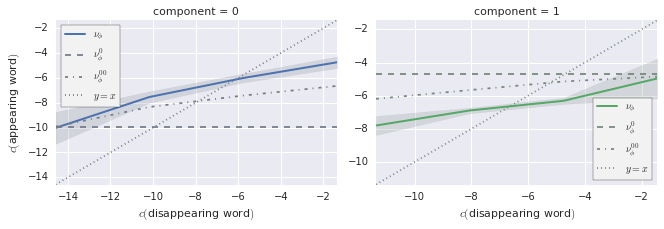

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1022 (cluster-unique) substitutions, but the PCA is in fact computed on 766 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global


    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
    * global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
   ** global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global


   ** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


    * global -> global
   ** global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
    * global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count


    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global
    * global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


    * global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 607 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.10627703379066165

intercept                      5.765905
global_aoa                     0.086340
global_clustering              0.163375
global_frequency               0.453360
global_letters_count          -0.078848
global_orthographic_density   -0.146183
global_synonyms_count         -0.077766
dtype: float64

Regressing global frequency with 607 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.1389896728428438

intercept                                              8.796381
global_aoa                                            -0.084672
global_clustering                                      1.582607
global_frequency                                       1.322926
global_letters_count                                  -0.798685
global_orthographic_density                            0.137994
global_synon

Regressing rel frequency with 607 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.2931813974999853

intercept                                       -1.448235
rel_aoa                                          0.101017
rel_clustering                                   0.070676
rel_frequency                                    0.672109
rel_letters_count                                0.024966
rel_orthographic_density                        -0.734721
rel_synonyms_count                               0.207055
rel_aoa * rel_clustering                        -0.110132
rel_aoa * rel_frequency                         -0.053918
rel_aoa * rel_letters_count                     -0.001110
rel_aoa * rel_orthographic_density               0.098053
rel_aoa * rel_synonyms_count                     0.012364
rel_clustering * rel_frequency                  -0.129558
rel_clustering * rel_letters_count              -0.109111
rel_clustering * rel_orthographic_density       -0.152947
rel_clustering * 

Regressing global aoa with 535 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.15935761898656142

intercept                                             -12.068884
global_aoa                                              1.588130
global_clustering                                      -2.844728
global_frequency                                       -0.235637
global_letters_count                                    1.784836
global_orthographic_density                            -0.145261
global_synonyms_count                                  -2.545792
global_aoa * global_clustering                          0.086065
global_aoa * global_frequency                          -0.050785
global_aoa * global_letters_count                      -0.046961
global_aoa * global_orthographic_density               -0.024060
global_aoa * global_synonyms_count                      0.148902
global_clustering * global_frequency                    0.013647
global_clustering * global_letters_count       

Regressing global aoa with 535 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.13152933383500487

intercept                      3.703088
global_aoa                     0.511147
global_clustering             -0.212265
global_frequency              -0.226482
global_letters_count           0.117397
global_orthographic_density    0.311756
global_synonyms_count          0.328799
rel_aoa                       -0.221133
rel_clustering                 0.022433
rel_frequency                  0.135919
rel_letters_count             -0.053340
rel_orthographic_density      -0.176154
rel_synonyms_count            -0.312809
dtype: float64

Regressing global aoa with 535 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.26944799731207014

intercept                                                 14.844272
global_aoa                                                 4.805805
global_clustering                                          1.539996
global_frequency                              

Regressing rel clustering with 483 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.04138233669912239

intercept                      1.965912
global_aoa                    -0.030323
global_clustering              0.091257
global_frequency              -0.075888
global_letters_count          -0.019346
global_orthographic_density   -0.040382
global_synonyms_count         -0.012356
dtype: float64

Regressing rel clustering with 483 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.0721334576330328

intercept                                             -0.425139
global_aoa                                             0.228203
global_clustering                                      0.146969
global_frequency                                      -0.261634
global_letters_count                                   0.551357
global_orthographic_density                            1.038213
global_synonyms_count                                 -0.116068
global_aoa * global_cluster

Regressing global clustering with 483 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.24416215613976452

intercept                                                 15.019925
global_aoa                                                 0.370623
global_clustering                                          4.449853
global_frequency                                          -1.200425
global_letters_count                                       0.679752
global_orthographic_density                               -1.842627
global_synonyms_count                                     -2.228676
rel_aoa                                                   -0.412571
rel_clustering                                            -5.672995
rel_frequency                                              0.268905
rel_letters_count                                         -0.290824
rel_orthographic_density                                   2.107412
rel_synonyms_count                                         1.5

Regressing global letters_count with 607 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.05650767896767184

intercept                   5.799372
rel_aoa                    -0.091350
rel_clustering              0.079579
rel_frequency               0.054579
rel_letters_count           0.235215
rel_orthographic_density   -0.164007
rel_synonyms_count         -0.254597
dtype: float64

Regressing global letters_count with 607 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07365215041779993

intercept                                        5.737202
rel_aoa                                         -0.249413
rel_clustering                                  -0.019100
rel_frequency                                    0.044320
rel_letters_count                                0.326366
rel_orthographic_density                        -0.058040
rel_synonyms_count                              -0.153453
rel_aoa * rel_clustering                         0.049894
rel_aoa

Regressing rel letters_count with 607 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.17703091464871334

intercept                      0.425370
global_aoa                     0.028748
global_clustering             -0.460462
global_frequency               0.012682
global_letters_count          -0.535989
global_orthographic_density    0.046495
global_synonyms_count          0.092112
rel_aoa                       -0.077605
rel_clustering                 0.409961
rel_frequency                 -0.048089
rel_letters_count              0.851295
rel_orthographic_density      -0.084378
rel_synonyms_count            -0.351187
dtype: float64

Regressing rel letters_count with 607 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.27457413819115317

intercept                                                -39.105866
global_aoa                                                 3.630710
global_clustering                                         -6.942775
global_frequency  

Regressing global synonyms_count with 587 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09133500438251174

intercept                                        0.506914
rel_aoa                                          0.027653
rel_clustering                                  -0.174609
rel_frequency                                    0.014012
rel_letters_count                               -0.065454
rel_orthographic_density                         0.052124
rel_synonyms_count                               0.148122
rel_aoa * rel_clustering                        -0.027188
rel_aoa * rel_frequency                         -0.008197
rel_aoa * rel_letters_count                      0.009641
rel_aoa * rel_orthographic_density               0.032212
rel_aoa * rel_synonyms_count                     0.014330
rel_clustering * rel_frequency                  -0.025623
rel_clustering * rel_letters_count               0.020842
rel_clustering * rel_orthographic_density       -0.064634


Regressing rel synonyms_count with 587 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.3365023961971422

intercept                                                 1.316524
global_aoa                                                0.316547
global_clustering                                         1.672427
global_frequency                                         -0.044864
global_letters_count                                      0.209374
global_orthographic_density                               2.398321
global_synonyms_count                                     3.700225
rel_aoa                                                  -0.193247
rel_clustering                                           -1.709252
rel_frequency                                            -0.340800
rel_letters_count                                        -0.149937
rel_orthographic_density                                 -1.788950
rel_synonyms_count                                       -5.372336
global

Regressing rel orthographic_density with 502 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.13332323947682245

intercept                  -0.529805
rel_aoa                     0.008312
rel_clustering             -0.041497
rel_frequency               0.037959
rel_letters_count           0.023418
rel_orthographic_density    0.387113
rel_synonyms_count          0.052604
dtype: float64

Regressing rel orthographic_density with 502 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.15802259905681926

intercept                                       -0.491262
rel_aoa                                          0.102460
rel_clustering                                   0.030600
rel_frequency                                    0.051421
rel_letters_count                               -0.034668
rel_orthographic_density                         0.285079
rel_synonyms_count                              -0.073277
rel_aoa * rel_clustering                         